<a href="https://colab.research.google.com/github/ryukirisame/crop-yield-prediction/blob/main/crop%20yield%20predict_4.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# **DATA PREPROCESSING**

### **WORKING ON YIELD DATA**

In [164]:
df_yield = pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [165]:
df_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400

In [166]:
# RENAMING Value field to hg/ha_yield
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  hg/ha_yield  
0  Maize       1961  1961  hg/ha        14000  
1  Maize       1962  1962  hg/ha        14000  
2  Maize       1963  1963  hg/ha        14260  
3  Maize       1964  1964  hg/ha        14257  
4  Maize       1965  1965  hg/ha        14400

In [167]:
# dropping unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

Area   Item  Year  hg/ha_yield
0  Afghanistan  Maize  1961        14000
1  Afghanistan  Maize  1962        14000
2  Afghanistan  Maize  1963        14260
3  Afghanistan  Maize  1964        14257
4  Afghanistan  Maize  1965        14400

In [168]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


###**WORKING ON RAINFALL DATA**

In [169]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327
2  Afghanistan  1987                           327
3  Afghanistan  1989                           327
4  Afghanistan  1990                           327

In [170]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [171]:
# checking data types 
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [172]:
# converting average_rain_fall_mm_per_year from object to float
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [173]:
df_rain = df_rain.dropna()

In [174]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5947 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5947 non-null   object 
 1   Year                           5947 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.8+ KB


In [175]:
df_rain.describe()

Year  average_rain_fall_mm_per_year
count  5947.000000                    5947.000000
mean   2001.365899                    1124.743232
std       9.526335                     786.257365
min    1985.000000                      51.000000
25%    1993.000000                     534.000000
50%    2001.000000                    1010.000000
75%    2010.000000                    1651.000000
max    2017.000000                    3240.000000

In [176]:
# merge yield dataframe with rain dataframe by year and area columns 
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [177]:
yield_df.shape

(25385, 5)

In [178]:
yield_df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year
0  Afghanistan        Maize  1985        16652                          327.0
1  Afghanistan     Potatoes  1985       140909                          327.0
2  Afghanistan  Rice, paddy  1985        22482                          327.0
3  Afghanistan        Wheat  1985        12277                          327.0
4  Afghanistan        Maize  1986        16875                          327.0

In [179]:
yield_df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year
count  25385.000000   25385.000000                   25385.000000
mean    2001.278787   68312.278353                    1254.849754
std        9.143915   75213.292733                     804.449430
min     1985.000000      50.000000                      51.000000
25%     1994.000000   17432.000000                     630.000000
50%     2001.000000   38750.000000                    1150.000000
75%     2009.000000   94286.000000                    1761.000000
max     2016.000000  554855.000000                    3240.000000

### **WORKING ON PESTICIDES DATA**

In [180]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
4  Pesticides Use  Albania     Use  Pesticides (total)  1994   

                           Unit  Value  
0  tonnes of active ingredients  121.0  
1  tonnes of active ingredients  121.0  
2  tonnes of active ingredients  121.0  
3  tonnes of active ingredients  121.0  
4  tonnes of active ingredients  201.0

In [181]:
# renaming and dropping unnecessary columns
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

Area  Year  pesticides_tonnes
0  Albania  1990              121.0
1  Albania  1991              121.0
2  Albania  1992              121.0
3  Albania  1993              121.0
4  Albania  1994              201.0

In [182]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [183]:
# merging Pesticides dataframe with yield dataframe 
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [184]:
yield_df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  
0              121.0  
1              121.0  
2              121.0  
3              121.0  
4              121.0

### **WORKING ON TEMPERATURE DATA**

In [185]:
# now working on temperature data
avg_temp=  pd.read_csv('temp.csv')
avg_temp.head()

year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [186]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

Year           Area  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [187]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   Area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [188]:
avg_temp=avg_temp.dropna()

In [189]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68764 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      68764 non-null  int64  
 1   Area      68764 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [190]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [191]:
yield_df=yield_df.drop(['Year'], axis=1)
yield_df

Area            Item  hg/ha_yield  average_rain_fall_mm_per_year  \
0       Albania           Maize        36613                         1485.0   
1       Albania        Potatoes        66667                         1485.0   
2       Albania     Rice, paddy        23333                         1485.0   
3       Albania         Sorghum        12500                         1485.0   
4       Albania        Soybeans         7000                         1485.0   
...         ...             ...          ...                            ...   
28237  Zimbabwe     Rice, paddy        22581                          657.0   
28238  Zimbabwe         Sorghum         3066                          657.0   
28239  Zimbabwe        Soybeans        13142                          657.0   
28240  Zimbabwe  Sweet potatoes        22222                          657.0   
28241  Zimbabwe           Wheat        22888                          657.0   

       pesticides_tonnes  avg_temp  
0                 121.00     16.37  
1                 121.00     16.37  
2                 121.00     16.37  
3                 121.00     16.37  
4                 121.00     16.37  
...                  ...       ...  
28237            2550.07     19.76  
28238            2550.07     19.76  
28239            2550.07     19.76  
28240            2550.07     19.76  
28241            2550.07     19.76  

[28242 rows x 6 columns]

In [192]:
yield_df.shape

(28242, 6)

In [193]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   hg/ha_yield                    28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ MB


### **SAVING DATASET AS CSV**

In [194]:
# yield_df.to_csv('yield_df.csv')
# yield_df=pd.read_csv('yield_df.csv')

### **EXPLORING DATA**

In [246]:
yield_df.head()

Area         Item  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize        36613                         1485.0   
1  Albania     Potatoes        66667                         1485.0   
2  Albania  Rice, paddy        23333                         1485.0   
3  Albania      Sorghum        12500                         1485.0   
4  Albania     Soybeans         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [195]:
yield_df.groupby('Item').count()

Area  hg/ha_yield  average_rain_fall_mm_per_year  \
Item                                                                     
Cassava               2045         2045                           2045   
Maize                 4121         4121                           4121   
Plantains and others   556          556                            556   
Potatoes              4276         4276                           4276   
Rice, paddy           3388         3388                           3388   
Sorghum               3039         3039                           3039   
Soybeans              3223         3223                           3223   
Sweet potatoes        2890         2890                           2890   
Wheat                 3857         3857                           3857   
Yams                   847          847                            847   

                      pesticides_tonnes  avg_temp  
Item                                               
Cassava                            2045      2045  
Maize                              4121      4121  
Plantains and others                556       556  
Potatoes                           4276      4276  
Rice, paddy                        3388      3388  
Sorghum                            3039      3039  
Soybeans                           3223      3223  
Sweet potatoes                     2890      2890  
Wheat                              3857      3857  
Yams                                847       847

In [196]:
yield_df['Area'].nunique()

101

In [212]:
yield_df['hg/ha_yield'].describe()

count     28242.000000
mean      77053.332094
std       84956.612897
min          50.000000
25%       19919.250000
50%       38295.000000
75%      104676.750000
max      501412.000000
Name: hg/ha_yield, dtype: float64

## **VISUALISING DATA**

<Axes: >

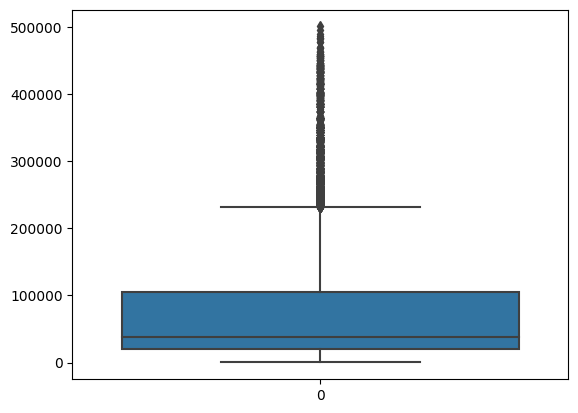

In [218]:
sns.boxplot(yield_df['hg/ha_yield'])

<Axes: >

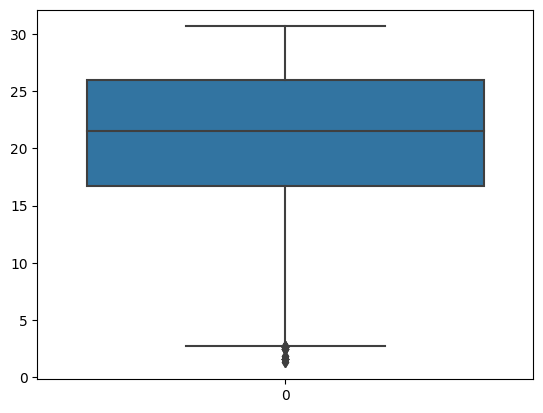

In [217]:
sns.boxplot(yield_df['avg_temp'])

<Axes: >

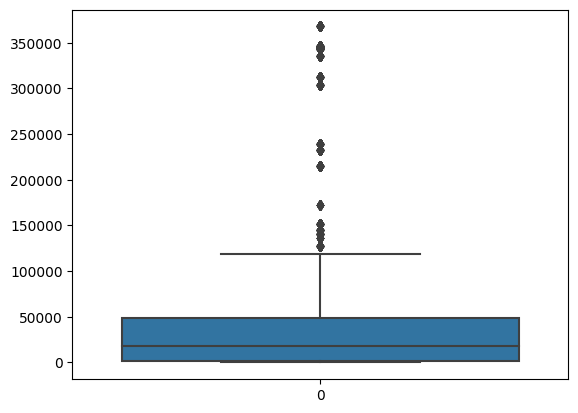

In [216]:
sns.boxplot(yield_df['pesticides_tonnes'])

<Axes: >

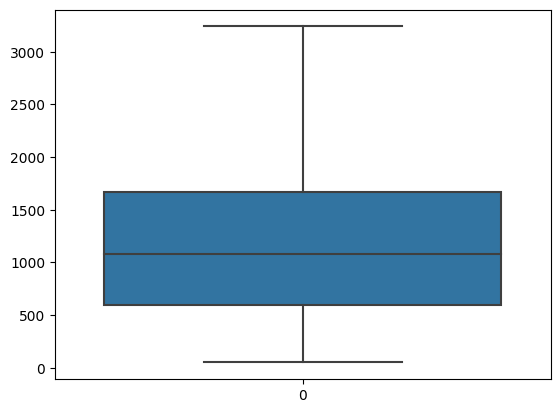

In [215]:
sns.boxplot(yield_df['average_rain_fall_mm_per_year'])

In [197]:
# Top countries based on yield
top_countries=yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)
top_countries

Area
India                 327420324
Brazil                167550306
Mexico                130788528
Japan                 124470912
Australia             109111062
Pakistan               73897434
Indonesia              69193506
United Kingdom         55419990
Turkey                 52263950
Spain                  46773540
South Africa           41333132
Germany                38780463
Egypt                  36828848
Canada                 34706922
Argentina              32864032
Italy                  32280700
Colombia               26927138
Dominican Republic     25312166
Morocco                22173010
Ecuador                21315591
Name: hg/ha_yield, dtype: int64

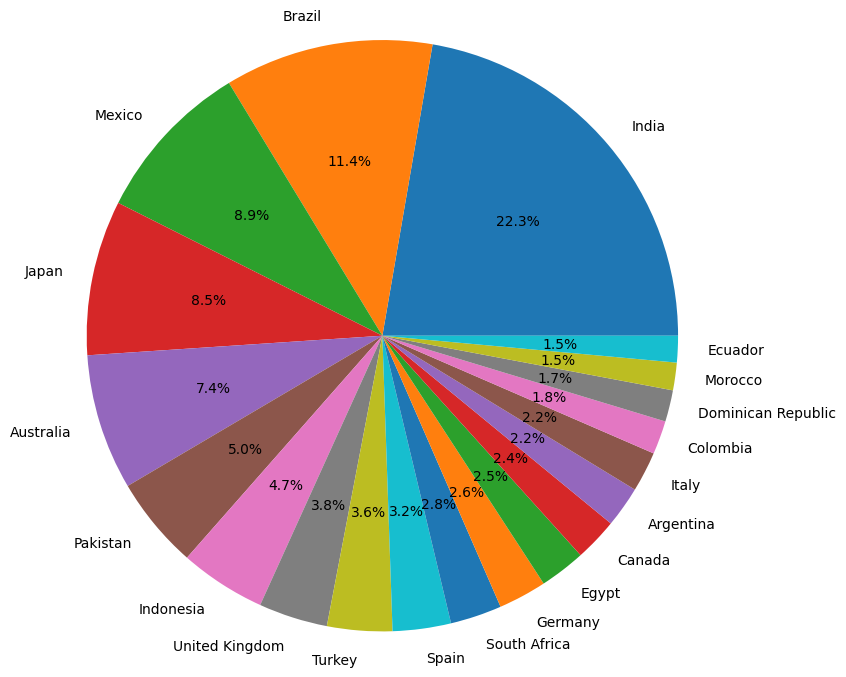

In [274]:
# Top 20 Countries based on yield
plt.pie(top_countries.values,labels=top_countries.keys(), autopct='%.1f%%', radius=2)
plt.savefig('Top Countries based on yield.png', dpi=600)
plt.show()

In [220]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [255]:
# Top coutries based on pesticides used

top_countries_pesticides=yield_df.groupby(['Area'],sort=True)['pesticides_tonnes'].sum().nlargest(10)
top_countries_pesticides

Area
Brazil       4.320309e+08
India        1.961622e+08
Japan        6.789576e+07
Mexico       6.384050e+07
Australia    3.198921e+07
Italy        2.581664e+07
Argentina    2.499804e+07
Canada       2.379243e+07
Colombia     2.193277e+07
Turkey       2.081824e+07
Name: pesticides_tonnes, dtype: float64

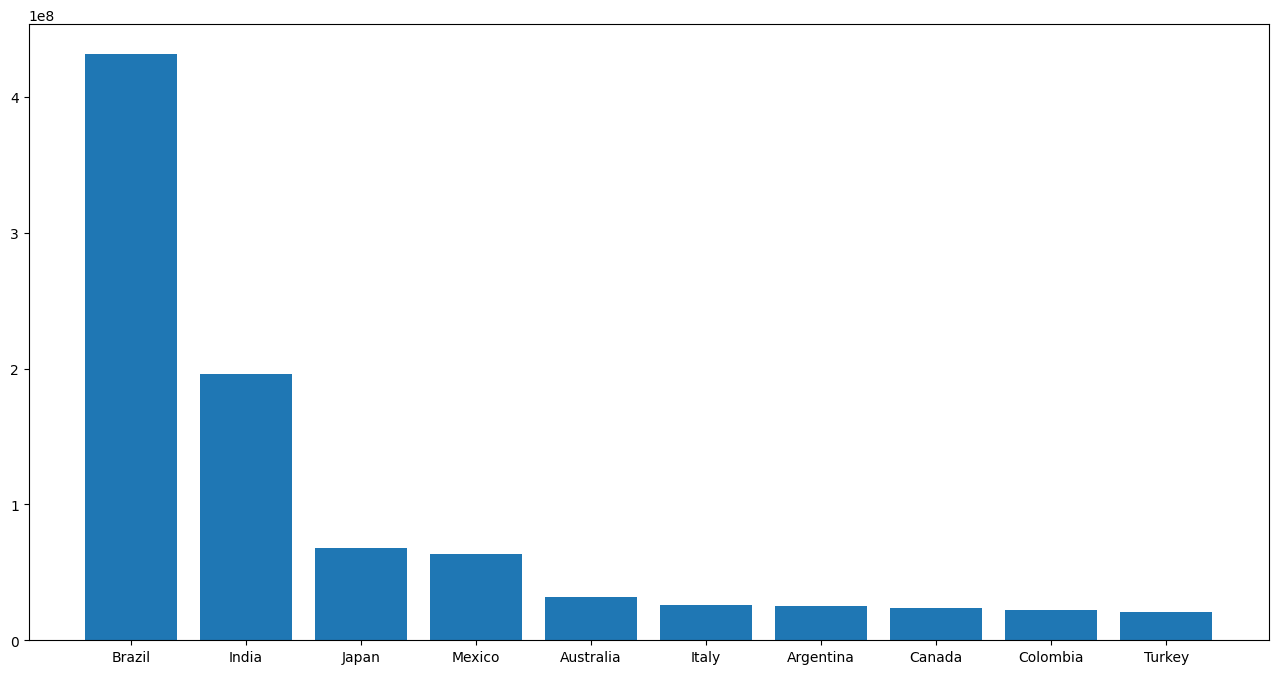

In [256]:

plt.figure(figsize=(16,8))
plt.bar(top_countries_pesticides.keys(),top_countries_pesticides.values)
plt.savefig('Top Countries based on pesticides.png', dpi=600)
plt.show()

In [257]:
# Countries with most average_rain_fall_mm_per_year

top_countries_rainfall=yield_df.groupby(['Area'],sort=True)['average_rain_fall_mm_per_year'].sum().nlargest(10)
top_countries_rainfall

Area
India                 4383984.0
Brazil                4009797.0
Indonesia             2237256.0
Japan                 1611288.0
Ecuador               1412154.0
Colombia              1341360.0
Mexico                1115776.0
Bangladesh             783804.0
Pakistan               715806.0
Dominican Republic     518880.0
Name: average_rain_fall_mm_per_year, dtype: float64

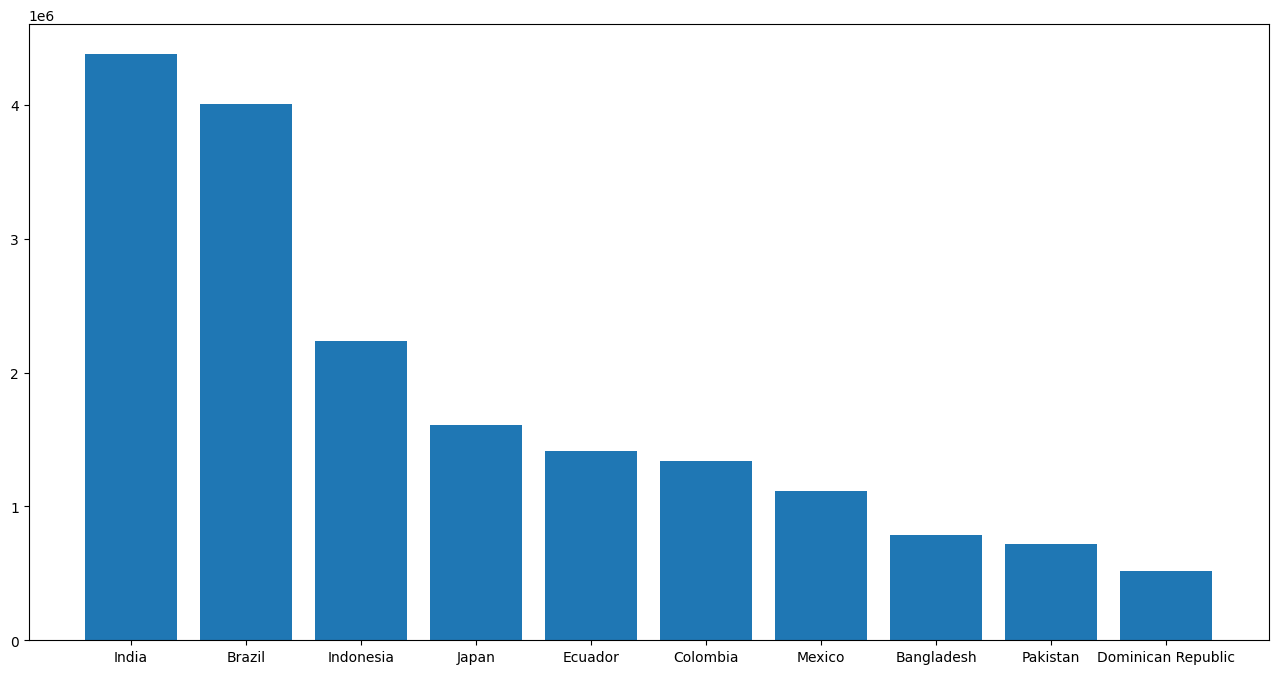

In [258]:
plt.figure(figsize=(16,8))
plt.bar(top_countries_rainfall.keys(),top_countries_rainfall.values)
plt.savefig('Countries with most average_rain_fall_mm_per_year.png', dpi=600)
plt.show()

In [263]:
# Top items yielded

top_items=yield_df.groupby(['Item'], sort=True)['hg/ha_yield'].sum().nlargest(20)
top_items

Item
Potatoes                854351426
Sweet potatoes          344077024
Cassava                 307730510
Maize                   149633801
Rice, paddy             137994713
Wheat                   116158445
Yams                     96676873
Plantains and others     58958974
Sorghum                  56634127
Soybeans                 53924312
Name: hg/ha_yield, dtype: int64

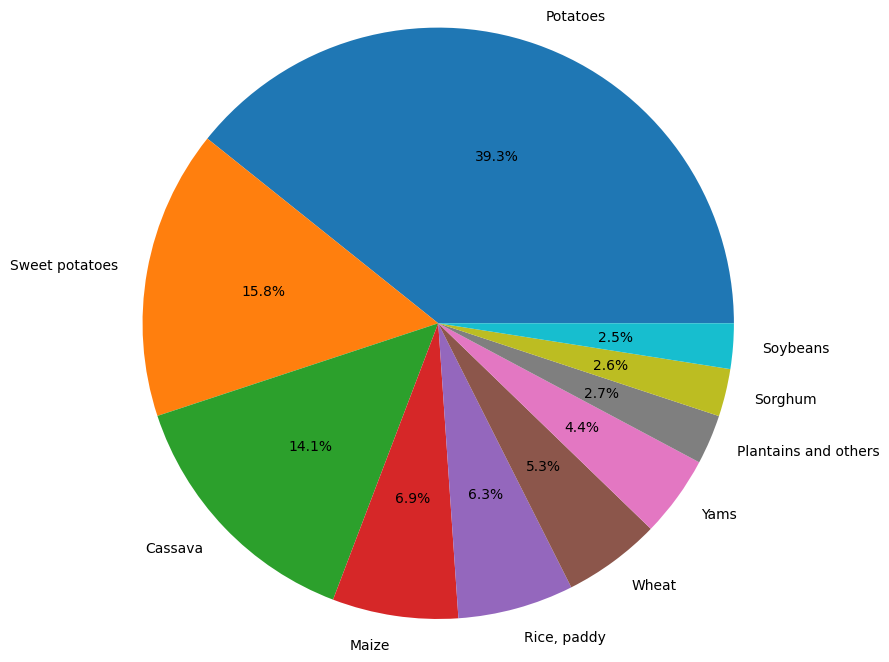

In [273]:
# Top items yielded
plt.pie(top_items.values,labels=top_items.keys(), autopct='%.1f%%', radius=2)
plt.savefig('Top items yielded.png', dpi=600)
plt.show()


In [203]:
corr_matrix=yield_df.corr()
corr_matrix

<ipython-input-203-e96cce868156>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=yield_df.corr()


hg/ha_yield  average_rain_fall_mm_per_year  \
hg/ha_yield                       1.000000                       0.000962   
average_rain_fall_mm_per_year     0.000962                       1.000000   
pesticides_tonnes                 0.064085                       0.180984   
avg_temp                         -0.114777                       0.313040   

                               pesticides_tonnes  avg_temp  
hg/ha_yield                             0.064085 -0.114777  
average_rain_fall_mm_per_year           0.180984  0.313040  
pesticides_tonnes                       1.000000  0.030946  
avg_temp                                0.030946  1.000000

<ipython-input-204-f2e5fe84924b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = yield_df.corr()


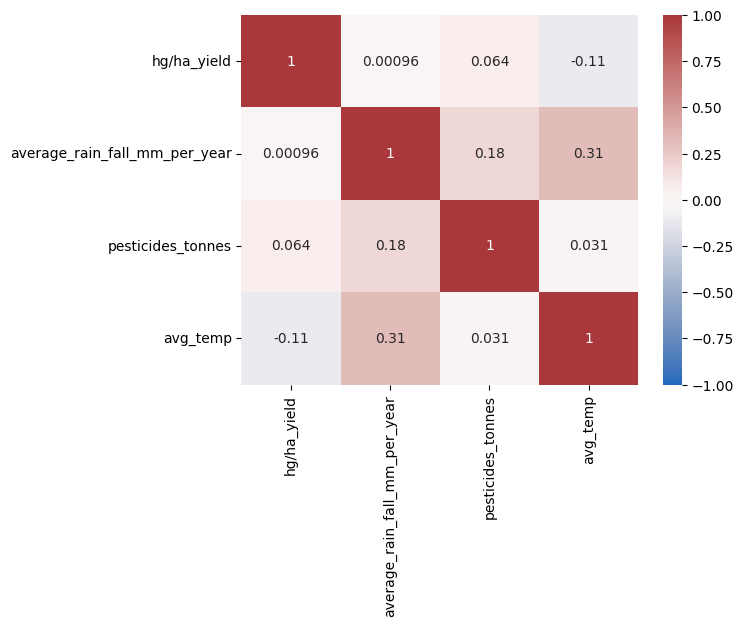

In [204]:
corr_matrix = yield_df.corr()
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.savefig('correlation.png', dpi=600)
plt.show()

## **ENCODING, SCALING AND EXTRACTING FEATURES AND LABELS**

In [205]:
from sklearn.preprocessing import OneHotEncoder
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
yield_df_onehot.head()

hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0        36613                         1485.0              121.0     16.37   
1        66667                         1485.0              121.0     16.37   
2        23333                         1485.0              121.0     16.37   
3        12500                         1485.0              121.0     16.37   
4         7000                         1485.0              121.0     16.37   

   Country_Albania  Country_Algeria  Country_Angola  Country_Argentina  \
0                1                0               0                  0   
1                1                0               0                  0   
2                1                0               0                  0   
3                1                0               0                  0   
4                1                0               0                  0   

   Country_Armenia  Country_Australia  ...  Item_Cassava  Item_Maize  \
0                0                  0  ...             0           1   
1                0                  0  ...             0           0   
2                0                  0  ...             0           0   
3                0                  0  ...             0           0   
4                0                  0  ...             0           0   

   Item_Plantains and others  Item_Potatoes  Item_Rice, paddy  Item_Sorghum  \
0                          0              0                 0             0   
1                          0              1                 0             0   
2                          0              0                 1             0   
3                          0              0                 0             1   
4                          0              0                 0             0   

   Item_Soybeans  Item_Sweet potatoes  Item_Wheat  Item_Yams  
0              0                    0           0          0  
1              0                    0           0          0  
2              0                    0           0          0  
3              0                    0           0          0  
4              1                    0           0          0  

[5 rows x 115 columns]

In [206]:
# yield_df_onehot=yield_df_onehot.drop(['Year'], axis=1)


In [207]:
yield_df_onehot.head()

hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0        36613                         1485.0              121.0     16.37   
1        66667                         1485.0              121.0     16.37   
2        23333                         1485.0              121.0     16.37   
3        12500                         1485.0              121.0     16.37   
4         7000                         1485.0              121.0     16.37   

   Country_Albania  Country_Algeria  Country_Angola  Country_Argentina  \
0                1                0               0                  0   
1                1                0               0                  0   
2                1                0               0                  0   
3                1                0               0                  0   
4                1                0               0                  0   

   Country_Armenia  Country_Australia  ...  Item_Cassava  Item_Maize  \
0                0                  0  ...             0           1   
1                0                  0  ...             0           0   
2                0                  0  ...             0           0   
3                0                  0  ...             0           0   
4                0                  0  ...             0           0   

   Item_Plantains and others  Item_Potatoes  Item_Rice, paddy  Item_Sorghum  \
0                          0              0                 0             0   
1                          0              1                 0             0   
2                          0              0                 1             0   
3                          0              0                 0             1   
4                          0              0                 0             0   

   Item_Soybeans  Item_Sweet potatoes  Item_Wheat  Item_Yams  
0              0                    0           0          0  
1              0                    0           0          0  
2              0                    0           0          0  
3              0                    0           0          0  
4              1                    0           0          0  

[5 rows x 115 columns]

In [208]:
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].values
label=yield_df['hg/ha_yield'].values


In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [210]:
features.shape

(28242, 114)

In [211]:
label.shape

(28242,)

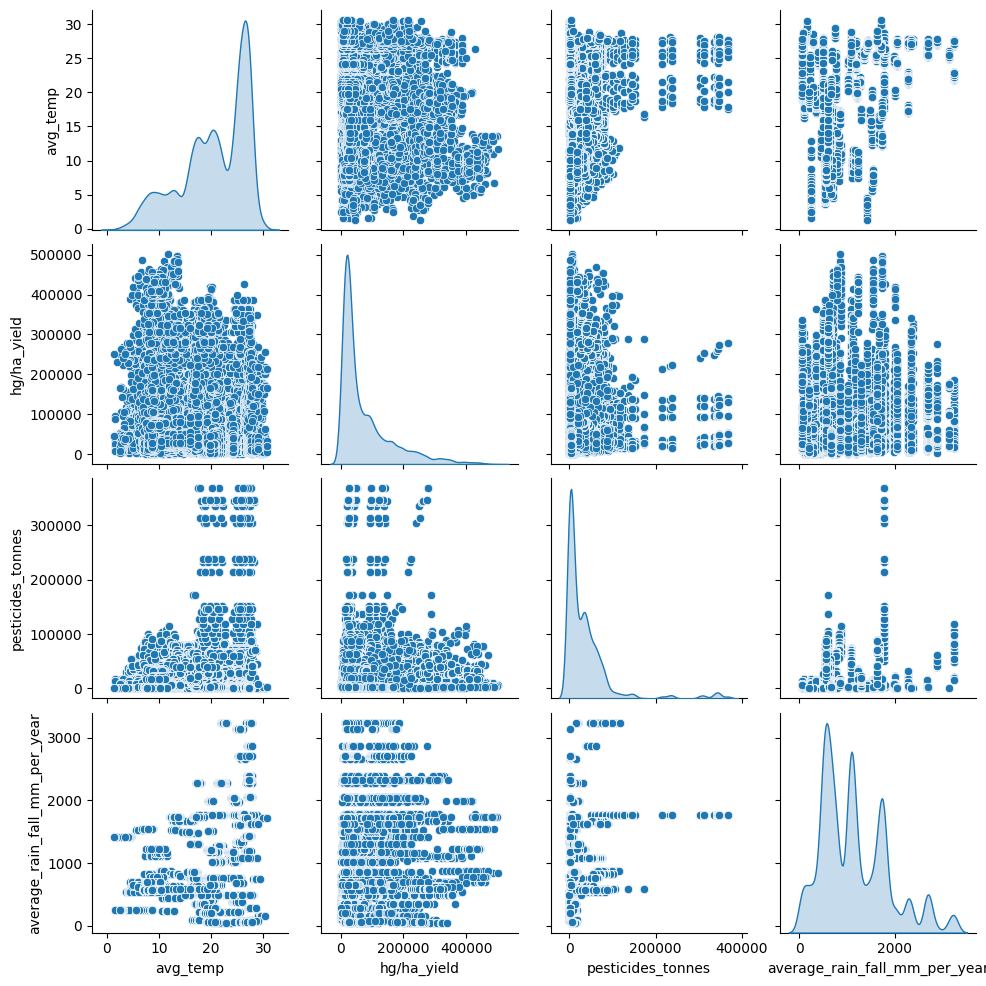

In [123]:
sns.pairplot(yield_df[['avg_temp', 'hg/ha_yield', 'pesticides_tonnes', 'average_rain_fall_mm_per_year']], diag_kind="kde")

# **WORKING ON FIRST 10K DATA**

In [276]:
features_10k=features[:10001, :]
label_10k=label[:10001]

In [277]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features_10k, label_10k, test_size=0.2, random_state=0)

In [278]:
# Fitting model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


regressor_linear_10k=LinearRegression()
regressor_linear_10k.fit(train_data, train_labels)

regressor_decision_tree_10k=DecisionTreeRegressor(random_state=0)
regressor_decision_tree_10k.fit(train_data, train_labels)

regressor_random_forest_10k=RandomForestRegressor(random_state=0)
regressor_random_forest_10k.fit(train_data, train_labels)

regressor_gradient_boosting_10k=GradientBoostingRegressor(random_state=0)
regressor_gradient_boosting_10k.fit(train_data, train_labels)




GradientBoostingRegressor(random_state=0)

In [279]:
# Predicting Values

linear_pred_10k=regressor_linear_10k.predict(test_data)
tree_pred_10k=regressor_decision_tree_10k.predict(test_data)
random_forest_pred_10k=regressor_random_forest_10k.predict(test_data)
gradient_boosting_pred_10k=regressor_gradient_boosting_10k.predict(test_data)

#### **Evaluating model**

In [280]:
from sklearn.metrics import r2_score
r2_linear_10k = r2_score(test_labels,linear_pred_10k)
r2_tree_10k=r2_score(test_labels, tree_pred_10k)
r2_random_forest_10k=r2_score(test_labels, random_forest_pred_10k)
r2_gradient_boosting_10k=r2_score(test_labels, gradient_boosting_pred_10k)
print("R2 Scores\nLinear Regression:", r2_linear_10k, "\nDecision Tree Regressor:", r2_tree_10k, "\nRandom Forest Regressor: ", r2_random_forest_10k)
print("Gradient Boosting: ", r2_gradient_boosting_10k)

R2 Scores
Linear Regression: 0.72510103187916 
Decision Tree Regressor: 0.9510179240626981 
Random Forest Regressor:  0.9613535341176784
Gradient Boosting:  0.895280949243177


In [281]:
from sklearn.metrics import mean_absolute_error
mae_linear_10k=mean_absolute_error(test_labels, linear_pred_10k)
mae_tree_10k=mean_absolute_error(test_labels, tree_pred_10k)
mae_random_forest_10k=mean_absolute_error(test_labels, random_forest_pred_10k)
mae_gradient_boosting_10k=mean_absolute_error(test_labels, gradient_boosting_pred_10k)
print("Mean Absolute Error\nLinear Regression:", mae_linear_10k, "\nDecision Tree Regressor:", mae_tree_10k, "\nRandom Forest Regressor: ", mae_random_forest_10k)
print("Gradient Boosting: ", mae_gradient_boosting_10k)

Mean Absolute Error
Linear Regression: 29138.021536106946 
Decision Tree Regressor: 5734.793603198401 
Random Forest Regressor:  6033.602589455272
Gradient Boosting:  17110.50017709817


In [282]:
from sklearn.metrics import mean_squared_error

mse_linear_10k=mean_squared_error(test_labels, linear_pred_10k)
mse_tree_10k=mean_squared_error(test_labels, tree_pred_10k)
mse_random_forest_10k=mean_squared_error(test_labels, random_forest_pred_10k)
mse_gradient_boosting_10k=mean_squared_error(test_labels, gradient_boosting_pred_10k)

print("Mean Squared Error\nLinear Regression:", mse_linear_10k, "\nDecision Tree Regressor:", mse_tree_10k, "\nRandom Forest Regressor: ", mse_random_forest_10k)
print("Gradient Boosting: ", mse_gradient_boosting_10k)


Mean Squared Error
Linear Regression: 1722567675.9792101 
Decision Tree Regressor: 306930729.09195405 
Random Forest Regressor:  242165888.70736396
Gradient Boosting:  656188901.4208146


In [284]:
rmse_linear_10k=np.sqrt(mean_squared_error(test_labels, linear_pred_10k))
rmse_tree_10k=np.sqrt(mean_squared_error(test_labels, tree_pred_10k))
rmse_random_forest_10k=np.sqrt(mean_squared_error(test_labels, random_forest_pred_10k))
rmse_gradient_boosting_10k=np.sqrt(mean_squared_error(test_labels, gradient_boosting_pred_10k))

print("Root Mean Squared Error\nLinear Regression:", rmse_linear_10k, "\nDecision Tree Regressor:", rmse_tree_10k, "\nRandom Forest Regressor: ", rmse_random_forest_10k)
print("Gradient Boosting: ", rmse_gradient_boosting_10k)

Root Mean Squared Error
Linear Regression: 41503.8272449567 
Decision Tree Regressor: 17519.438606643595 
Random Forest Regressor:  15561.680137676778
Gradient Boosting:  25616.184364983295


## **PLOTTING**

### **MULTIPLE LINEAR REGRESSION**

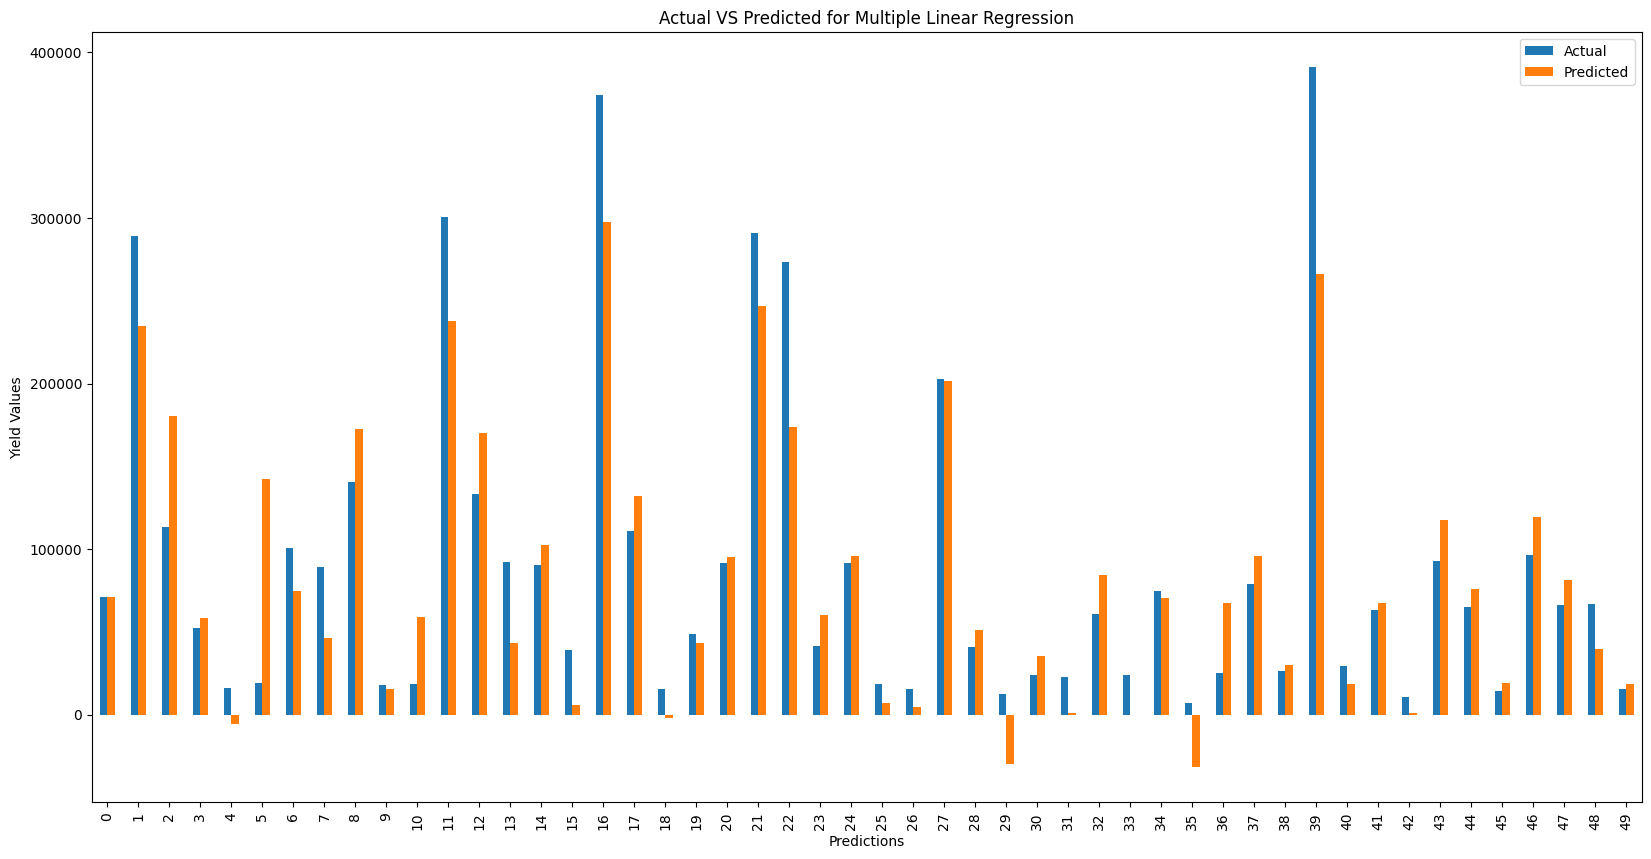

In [131]:
# Multiple Linear Regression
plot_10k_df_linear=pd.DataFrame({'Actual':test_labels, 'Predicted':linear_pred_10k})

bar_plot_10k_results=plot_10k_df_linear[:50]
bar_plot_10k_results.reset_index(inplace=True)
bar_plot_10k_results.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Multiple Linear Regression')
plt.show()


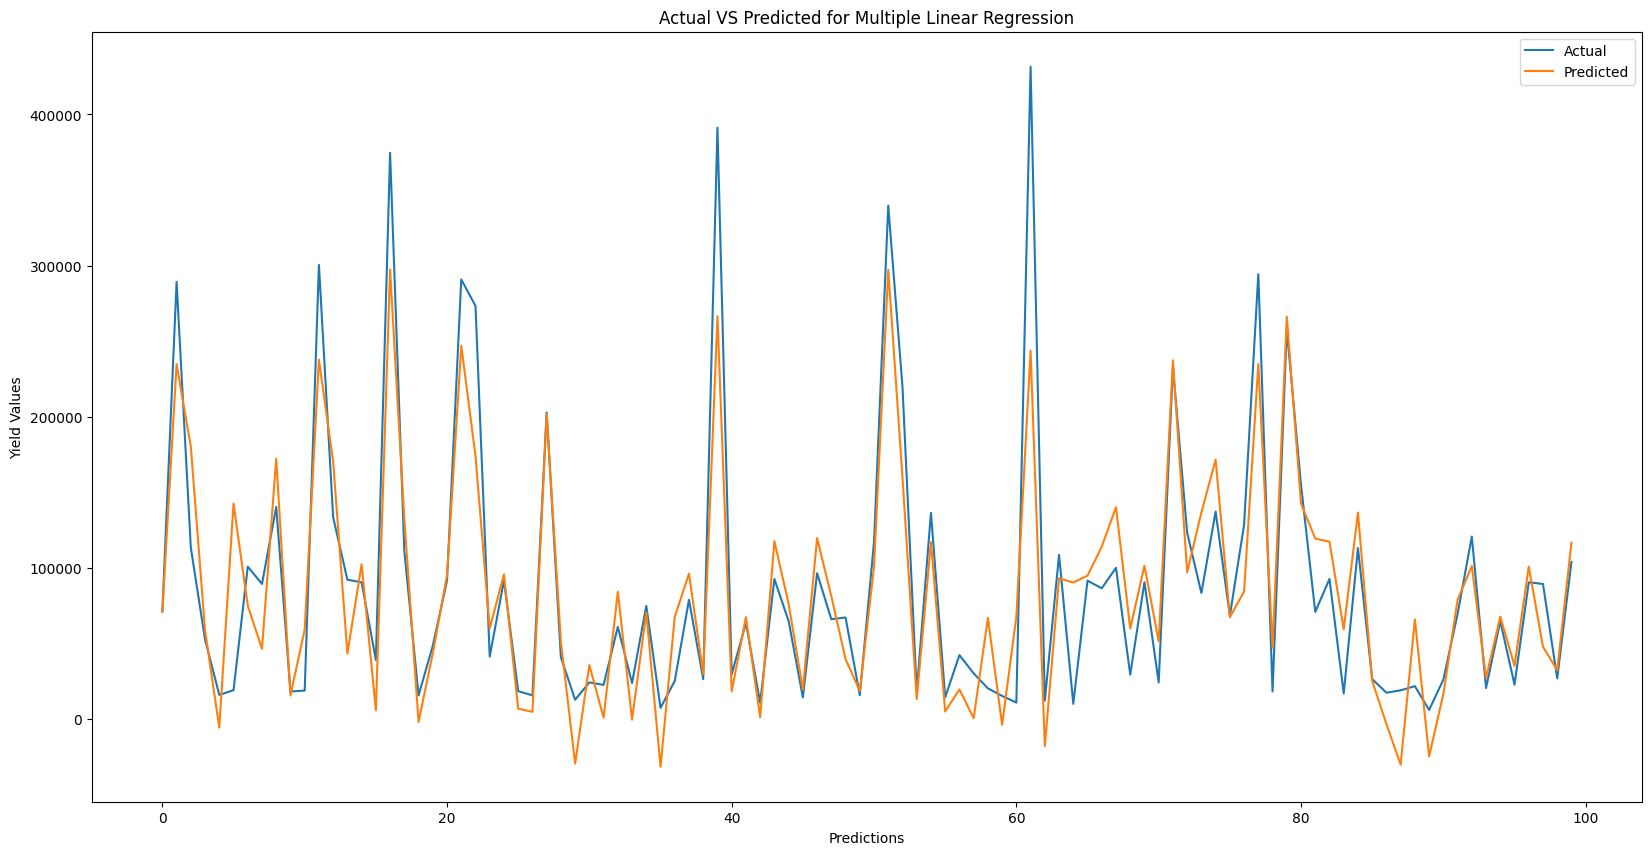

In [132]:
# Multiple Linear Regression Line Plot


line_plot_10k_results=plot_10k_df_linear[:100]
line_plot_10k_results.reset_index(inplace=True)
line_plot_10k_results.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Multiple Linear Regression')
plt.show()


### **DECISION TREE**

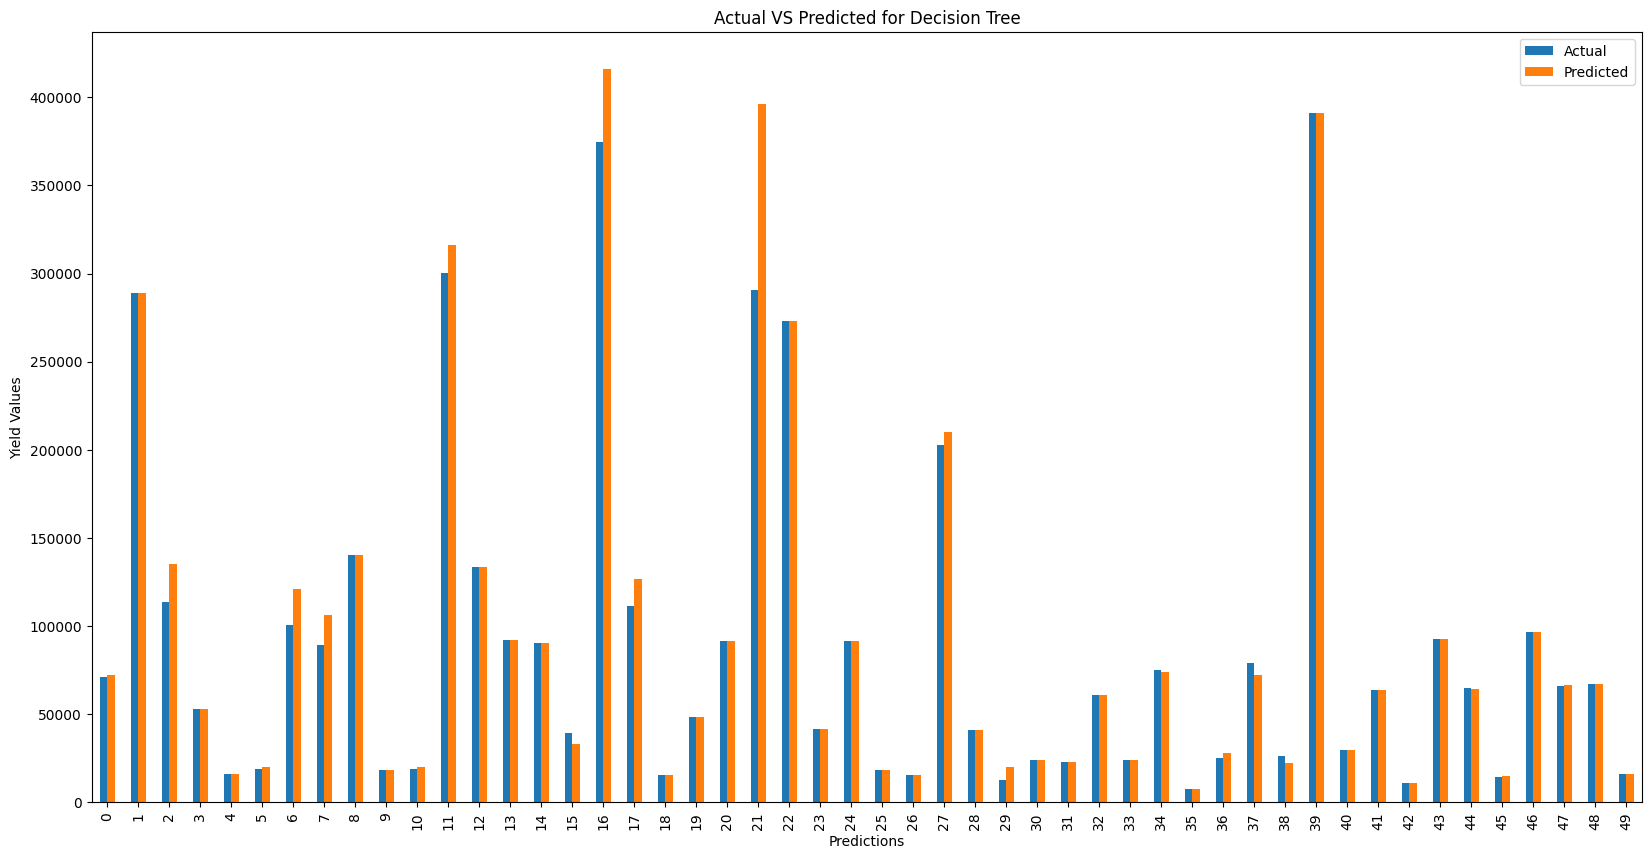

In [133]:

plot_10k_df_tree=pd.DataFrame({'Actual':test_labels, 'Predicted':tree_pred_10k})

bar_plot_10k_df_tree=plot_10k_df_tree[:50]
bar_plot_10k_df_tree.reset_index(inplace=True)
bar_plot_10k_df_tree.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Decision Tree')
plt.show()

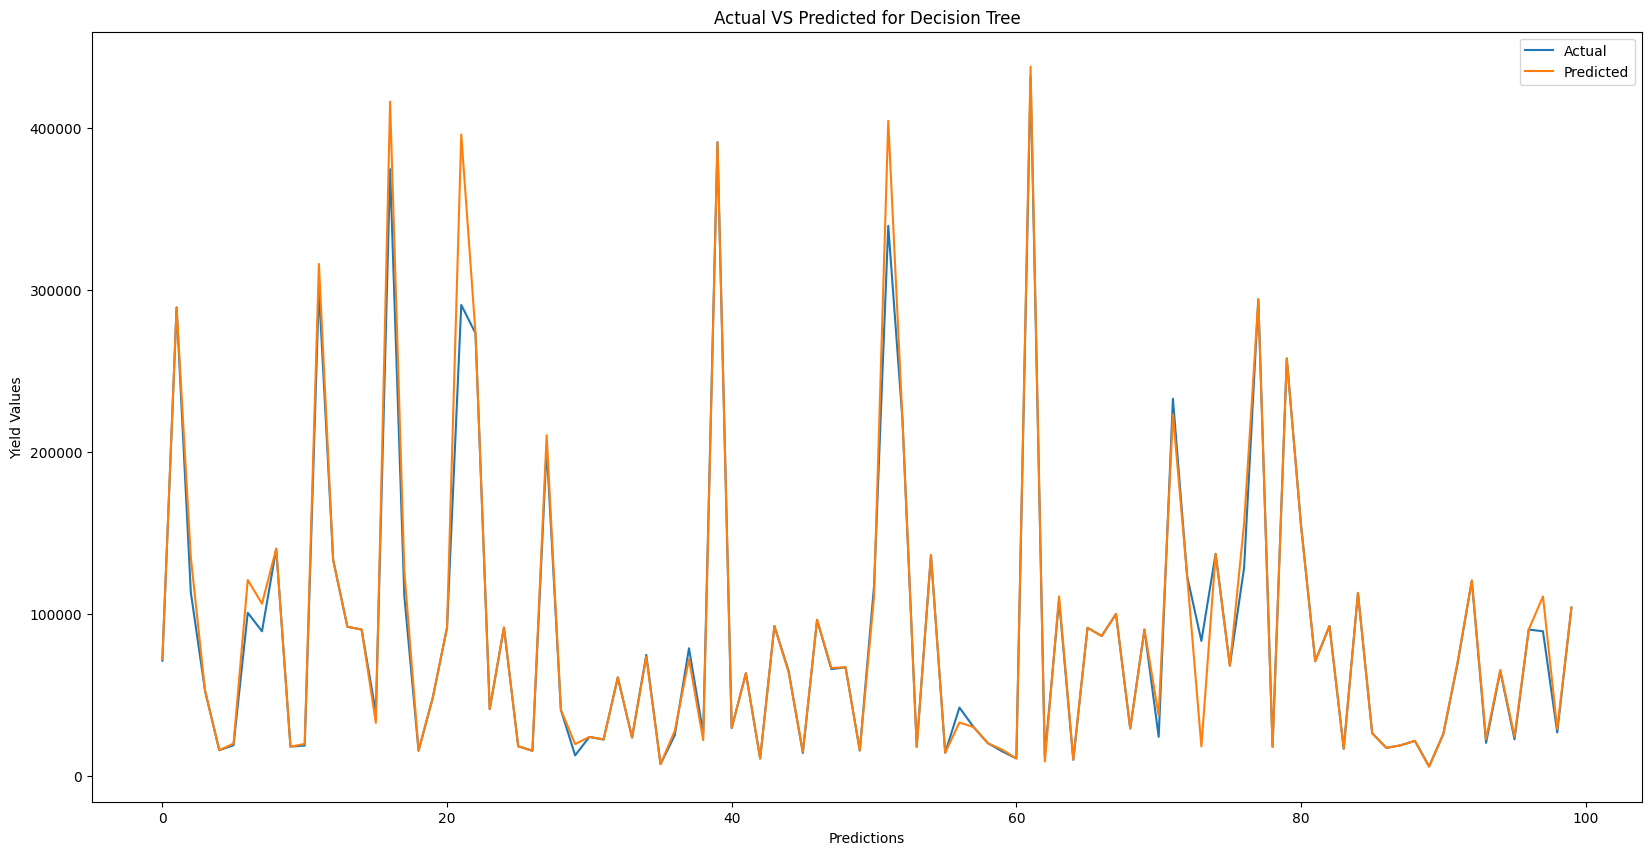

In [134]:
line_plot_10k_df_tree=plot_10k_df_tree[:100]
line_plot_10k_df_tree.reset_index(inplace=True)
line_plot_10k_df_tree.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Decision Tree')
plt.show()

### **RANDOM FOREST**

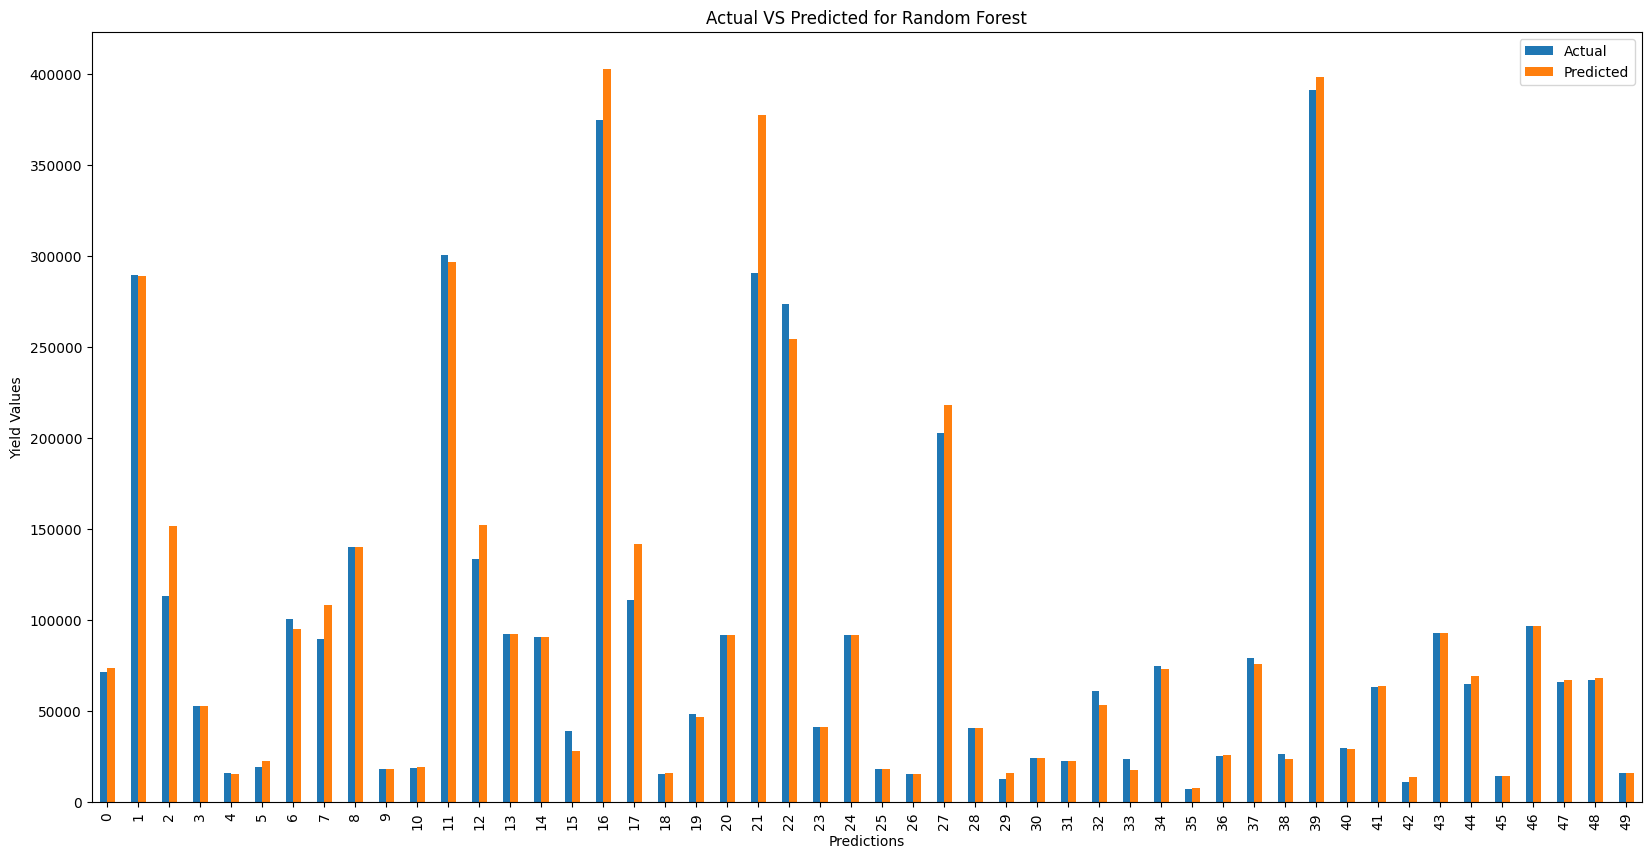

In [135]:
plot_10k_df_random_forest=pd.DataFrame({'Actual':test_labels, 'Predicted':random_forest_pred_10k})

bar_plot_10k_df_random_forest=plot_10k_df_random_forest[:50]
bar_plot_10k_df_random_forest.reset_index(inplace=True)
bar_plot_10k_df_random_forest.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Random Forest')
plt.show()

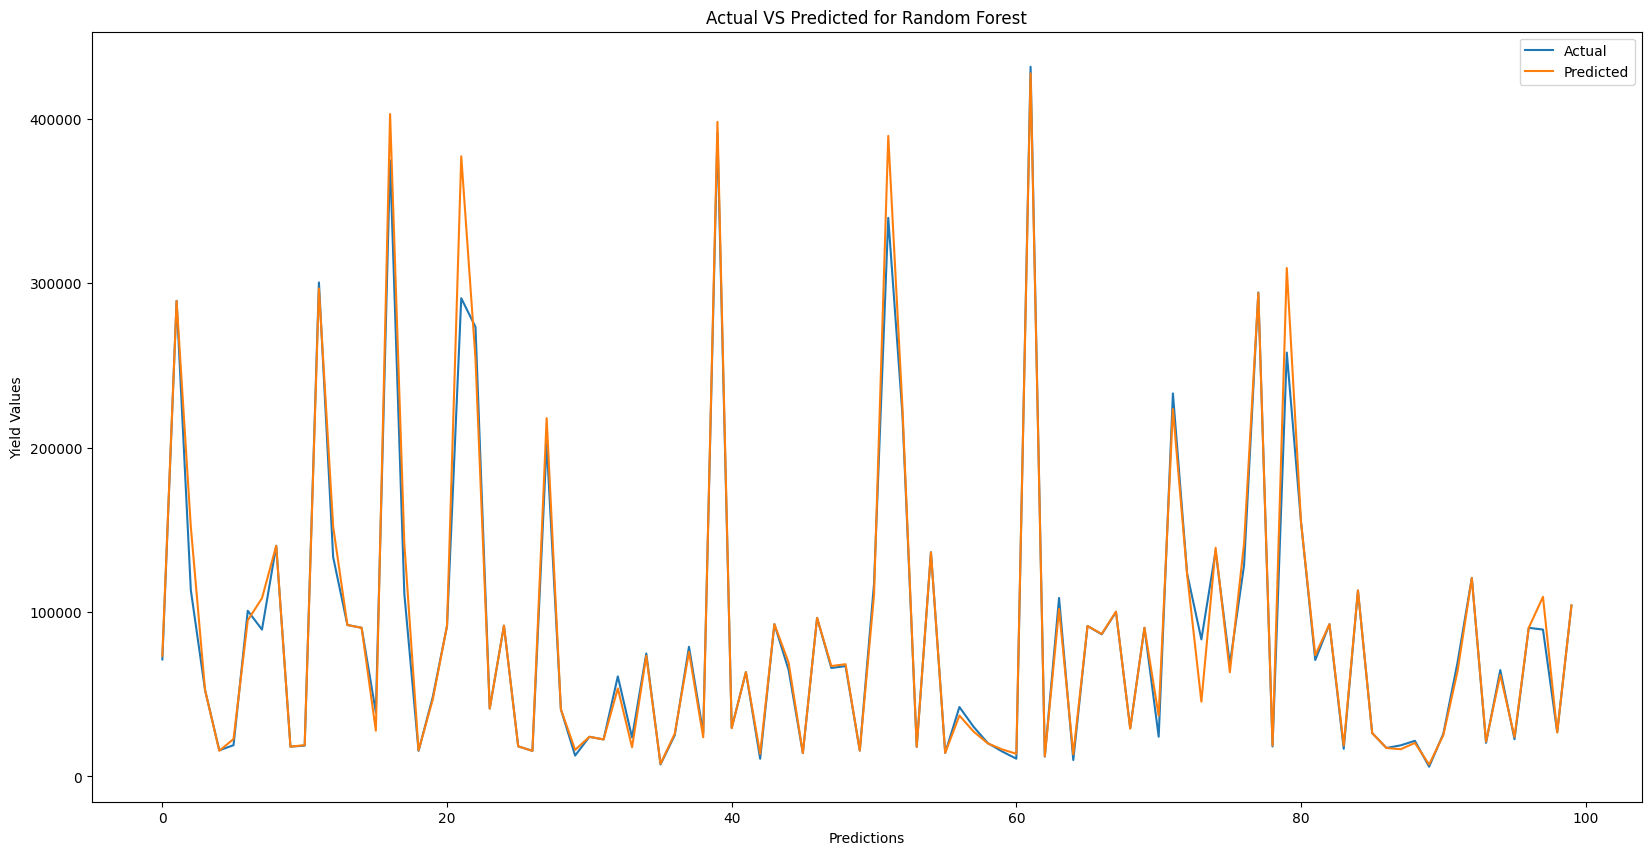

In [136]:
line_plot_10k_df_random_forest=plot_10k_df_random_forest[:100]
line_plot_10k_df_random_forest.reset_index(inplace=True)
line_plot_10k_df_random_forest.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Random Forest')
plt.show()

### **GRADIENT BOOSTING**

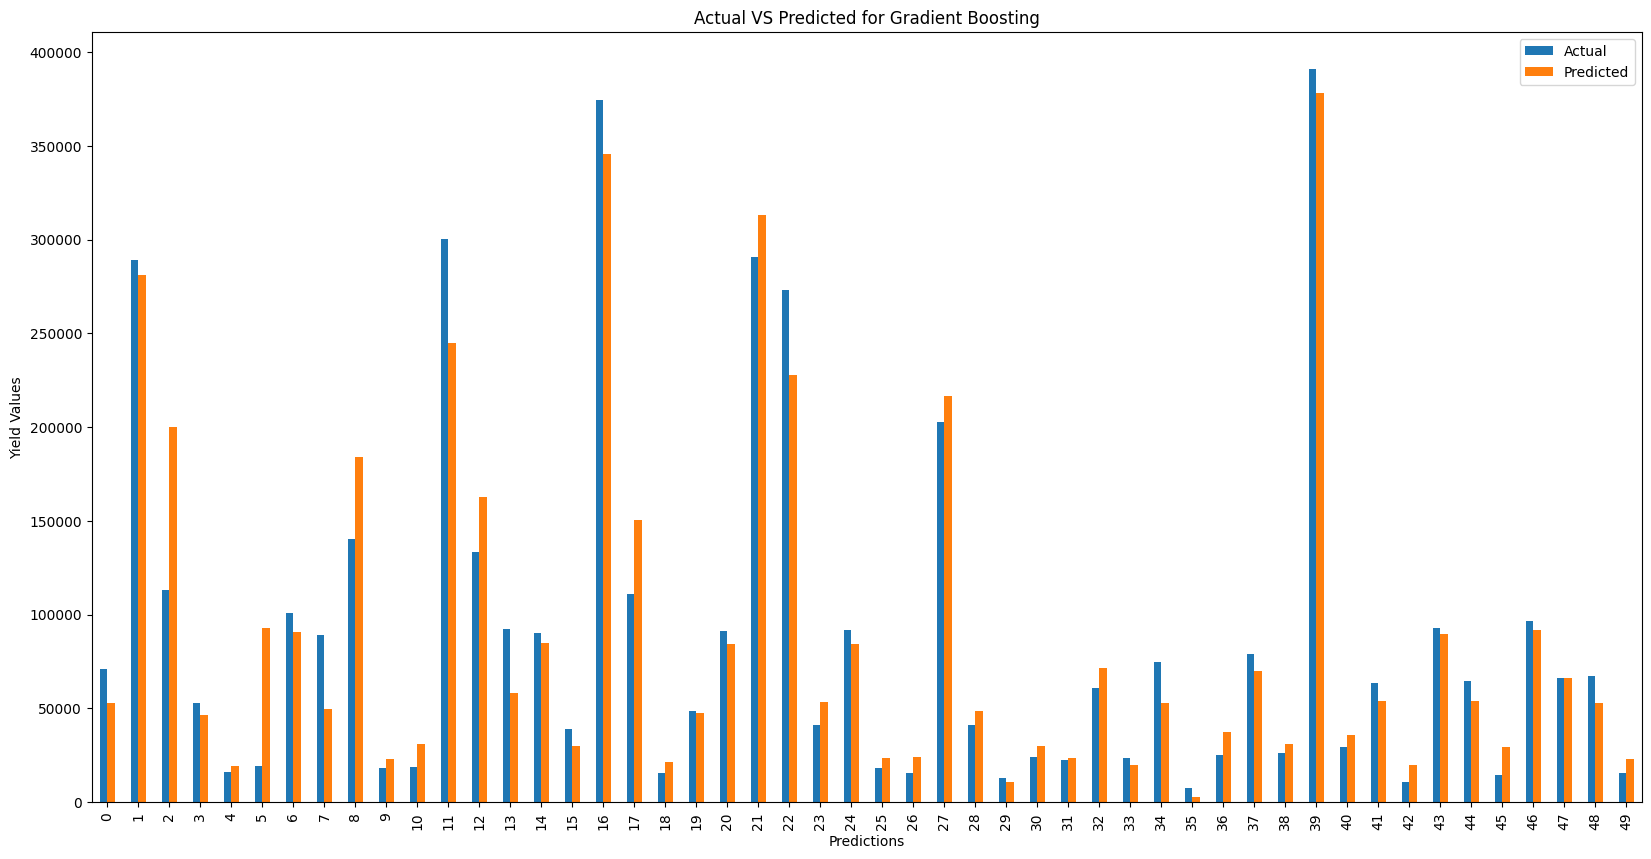

In [137]:
plot_10k_df_gradient_boosting=pd.DataFrame({'Actual':test_labels, 'Predicted':gradient_boosting_pred_10k})

bar_plot_10k_df_gradient_boosting=plot_10k_df_gradient_boosting[:50]
bar_plot_10k_df_gradient_boosting.reset_index(inplace=True)
bar_plot_10k_df_gradient_boosting.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Gradient Boosting')
plt.show()

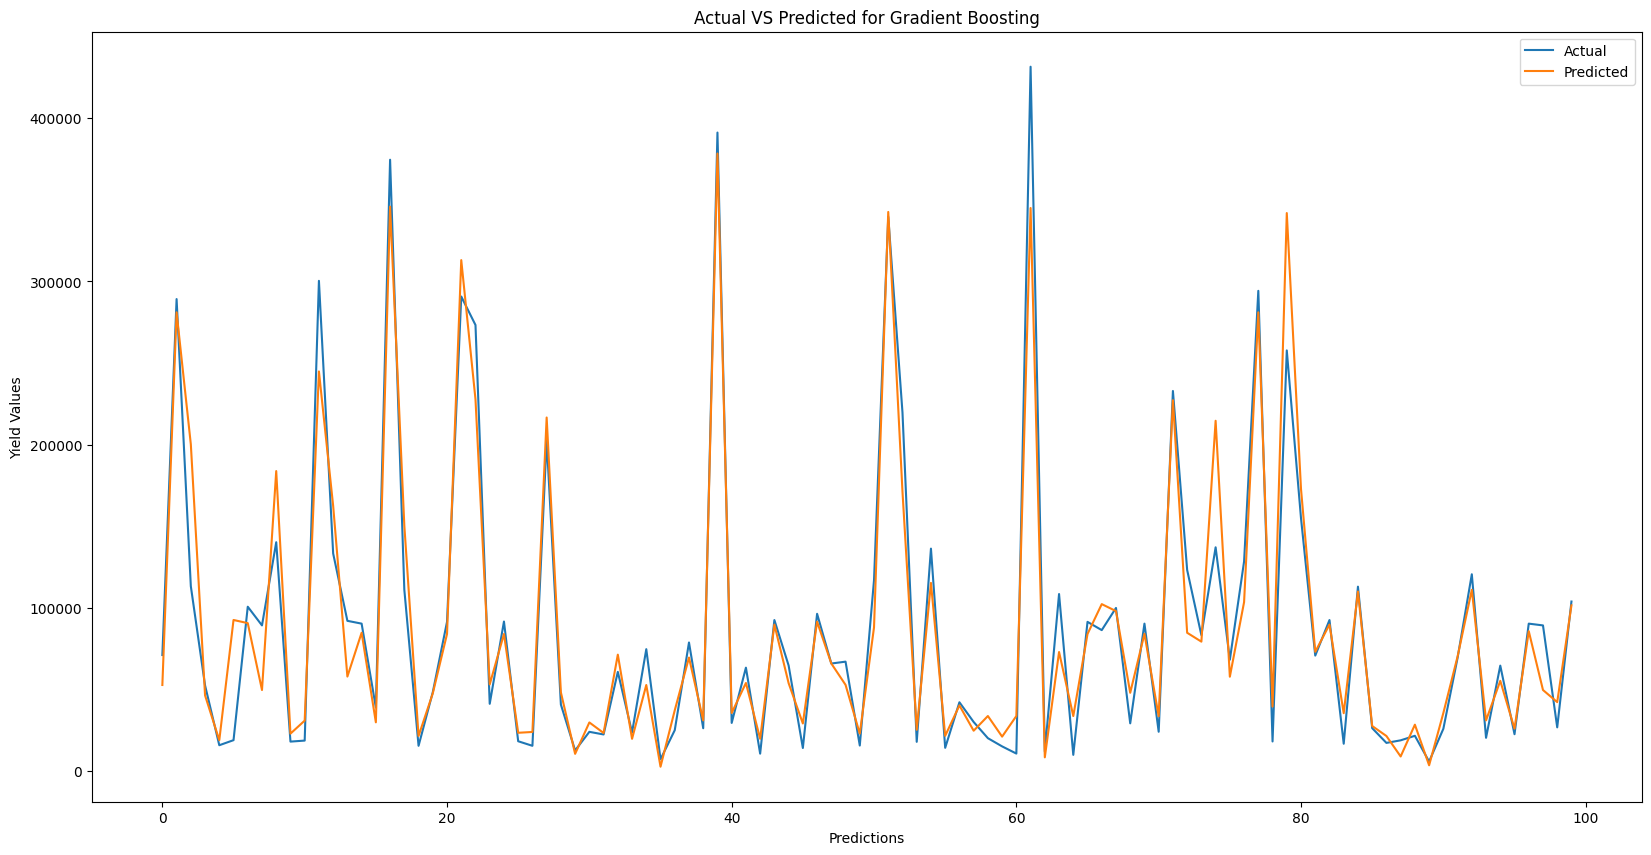

In [138]:
line_plot_10k_df_gradient_boosting=plot_10k_df_gradient_boosting[:100]
line_plot_10k_df_gradient_boosting.reset_index(inplace=True)
line_plot_10k_df_gradient_boosting.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Gradient Boosting')
plt.show()

## **TABULAR FORM**

In [139]:
print(np.concatenate((linear_pred_10k.reshape(len(linear_pred_10k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 70929.375    71151.     ]
 [234766.84375 289220.     ]
 [180113.71875 113330.     ]
 [ 58506.09375  52536.     ]
 [ -5773.90625  15898.     ]
 [142431.75     18998.     ]
 [ 74959.34375 100747.     ]
 [ 46351.71875  89302.     ]
 [172270.625   140264.     ]
 [ 15563.0625   18118.     ]]


In [140]:
print(np.concatenate((tree_pred_10k.reshape(len(tree_pred_10k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 72195.  71151.]
 [289220. 289220.]
 [134922. 113330.]
 [ 52536.  52536.]
 [ 15898.  15898.]
 [ 20000.  18998.]
 [121002. 100747.]
 [106321.  89302.]
 [140264. 140264.]
 [ 18118.  18118.]]


In [141]:
print(np.concatenate((random_forest_pred_10k.reshape(len(random_forest_pred_10k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 73391.96  71151.  ]
 [289154.67 289220.  ]
 [151790.3  113330.  ]
 [ 52511.21  52536.  ]
 [ 15614.13  15898.  ]
 [ 22740.48  18998.  ]
 [ 94930.32 100747.  ]
 [108403.32  89302.  ]
 [140264.   140264.  ]
 [ 18118.    18118.  ]]


In [142]:
print(np.concatenate((gradient_boosting_pred_10k.reshape(len(gradient_boosting_pred_10k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 52797.64879319  71151.        ]
 [281105.62195983 289220.        ]
 [200283.05873768 113330.        ]
 [ 46431.6446233   52536.        ]
 [ 18975.42739876  15898.        ]
 [ 92628.51749031  18998.        ]
 [ 90692.38916444 100747.        ]
 [ 49729.58050358  89302.        ]
 [183855.91435829 140264.        ]
 [ 22990.97230722  18118.        ]]


# **WORKING ON FIRST 20K ROWS**

In [322]:
features_20k=features[:20001, :]
label_20k=label[:20001]

In [323]:
train_data, test_data, train_labels, test_labels = train_test_split(features_20k, label_20k, test_size=0.2, random_state=0)

In [324]:
# Fitting Model

regressor_linear_20k=LinearRegression()
regressor_linear_20k.fit(train_data, train_labels)

regressor_decision_tree_20k=DecisionTreeRegressor(random_state=0)
regressor_decision_tree_20k.fit(train_data, train_labels)

regressor_random_forest_20k=RandomForestRegressor(random_state=0)
regressor_random_forest_20k.fit(train_data, train_labels)

regressor_gradient_boosting_20k=GradientBoostingRegressor(random_state=0)
regressor_gradient_boosting_20k.fit(train_data, train_labels)

GradientBoostingRegressor(random_state=0)

In [325]:
# Predicting Values

linear_pred_20k=regressor_linear_20k.predict(test_data)
tree_pred_20k=regressor_decision_tree_20k.predict(test_data)
random_forest_pred_20k=regressor_random_forest_20k.predict(test_data)
gradient_boosting_pred_20k=regressor_gradient_boosting_20k.predict(test_data)

## **EVALUATING MODELS**

In [326]:

mae_linear_20k=mean_absolute_error(test_labels, linear_pred_20k)
mae_tree_20k=mean_absolute_error(test_labels, tree_pred_20k)
mae_random_forest_20k=mean_absolute_error(test_labels, random_forest_pred_20k)
mae_gradient_boosting_20k=mean_absolute_error(test_labels, gradient_boosting_pred_20k)
print("Mean Absolute Error\nLinear Regression:", mae_linear_20k, "\nDecision Tree Regressor:", mae_tree_20k, "\nRandom Forest Regressor: ", mae_random_forest_20k)
print("Gradient Boosting: ", mae_gradient_boosting_20k)

Mean Absolute Error
Linear Regression: 29526.06898275431 
Decision Tree Regressor: 5374.519161876197 
Random Forest Regressor:  4873.863392813503
Gradient Boosting:  18081.089819800818


In [327]:

r2_linear_20k = r2_score(test_labels,linear_pred_20k)
r2_tree_20k=r2_score(test_labels, tree_pred_20k)
r2_random_forest_20k=r2_score(test_labels, random_forest_pred_20k)
r2_gradient_boosting_20k=r2_score(test_labels, gradient_boosting_pred_20k)
print("R2 Scores\nLinear Regression:", r2_linear_20k, "\nDecision Tree Regressor:", r2_tree_20k, "\nRandom Forest Regressor: ", r2_random_forest_20k)
print("Gradient Boosting: ", r2_gradient_boosting_20k)

R2 Scores
Linear Regression: 0.738071543598124 
Decision Tree Regressor: 0.9625174136568675 
Random Forest Regressor:  0.977632580849603
Gradient Boosting:  0.885191376095973


In [328]:

mse_linear_20k=mean_squared_error(test_labels, linear_pred_20k)
mse_tree_20k=mean_squared_error(test_labels, tree_pred_20k)
mse_random_forest_20k=mean_squared_error(test_labels, random_forest_pred_20k)
mse_gradient_boosting_20k=mean_squared_error(test_labels, gradient_boosting_pred_20k)

print("Mean Squared Error\nLinear Regression:", mse_linear_20k, "\nDecision Tree Regressor:", mse_tree_20k, "\nRandom Forest Regressor: ", mse_random_forest_20k)
print("Gradient Boosting: ", mse_gradient_boosting_20k)

Mean Squared Error
Linear Regression: 1785757093.383654 
Decision Tree Regressor: 255546095.90764114 
Random Forest Regressor:  152494990.26261848
Gradient Boosting:  782734023.38412


In [293]:
rmse_linear_20k=np.sqrt(mean_squared_error(test_labels, linear_pred_20k))
rmse_tree_20k=np.sqrt(mean_squared_error(test_labels, tree_pred_20k))
rmse_random_forest_20k=np.sqrt(mean_squared_error(test_labels, random_forest_pred_20k))
rmse_gradient_boosting_20k=np.sqrt(mean_squared_error(test_labels, gradient_boosting_pred_20k))

print("Root Mean Squared Error\nLinear Regression:", rmse_linear_20k, "\nDecision Tree Regressor:", rmse_tree_20k, "\nRandom Forest Regressor: ", rmse_random_forest_20k)
print("Gradient Boosting: ", rmse_gradient_boosting_20k)

Root Mean Squared Error
Linear Regression: 42258.219240564955 
Decision Tree Regressor: 15985.809204029714 
Random Forest Regressor:  12348.886195224995
Gradient Boosting:  27977.384141197334


## **PLOTTING**

#### **MULTIPLE LINEAR REGRESSION**

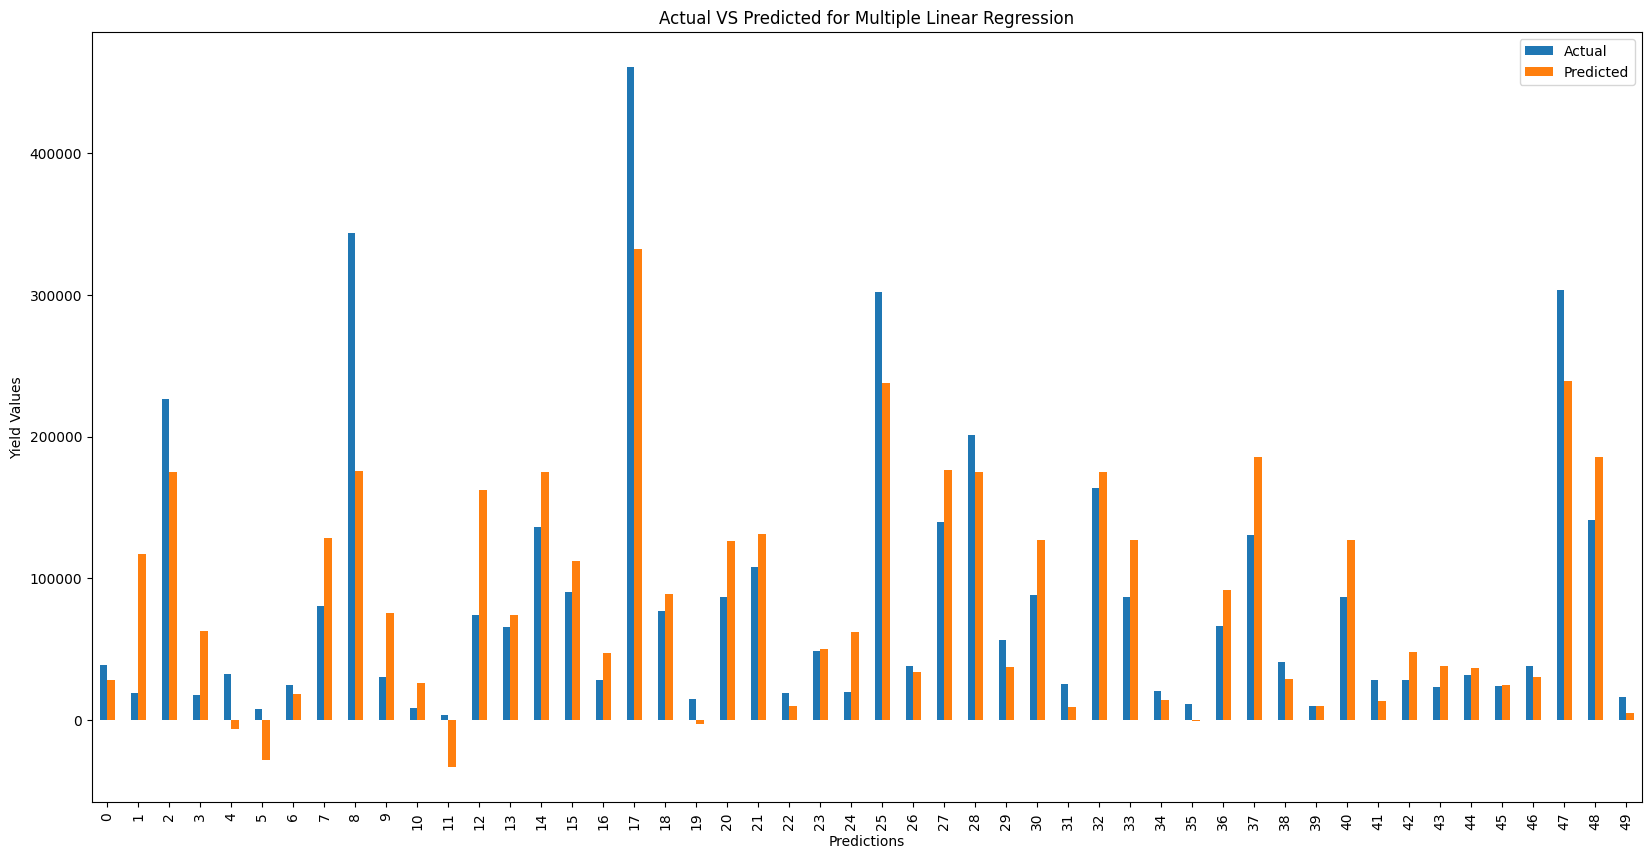

In [300]:
# MULTIPLE LINEAR REGRESSION BAR PLOT

plot_20k_df_linear=pd.DataFrame({'Actual':test_labels, 'Predicted':linear_pred_20k})

bar_plot_20k_results=plot_20k_df_linear[:50]
bar_plot_20k_results.reset_index(inplace=True)
bar_plot_20k_results.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Multiple Linear Regression')
plt.show()

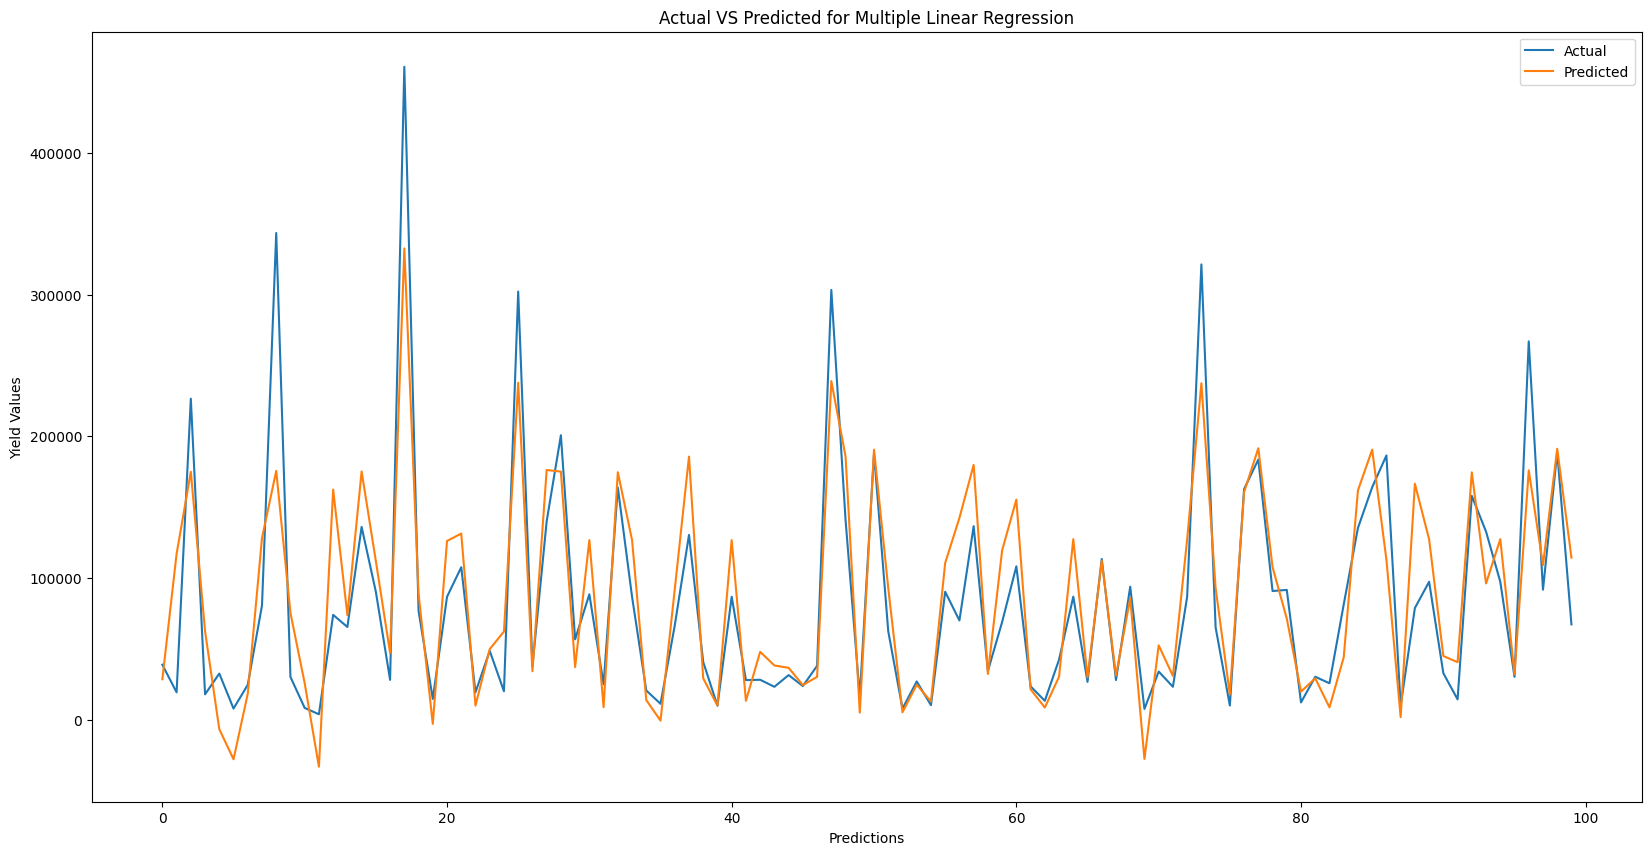

In [301]:
# Multiple Linear Regression Line Plot


line_plot_20k_results=plot_20k_df_linear[:100]
line_plot_20k_results.reset_index(inplace=True)
line_plot_20k_results.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Multiple Linear Regression')
plt.show()

#### **DECISION TREE**

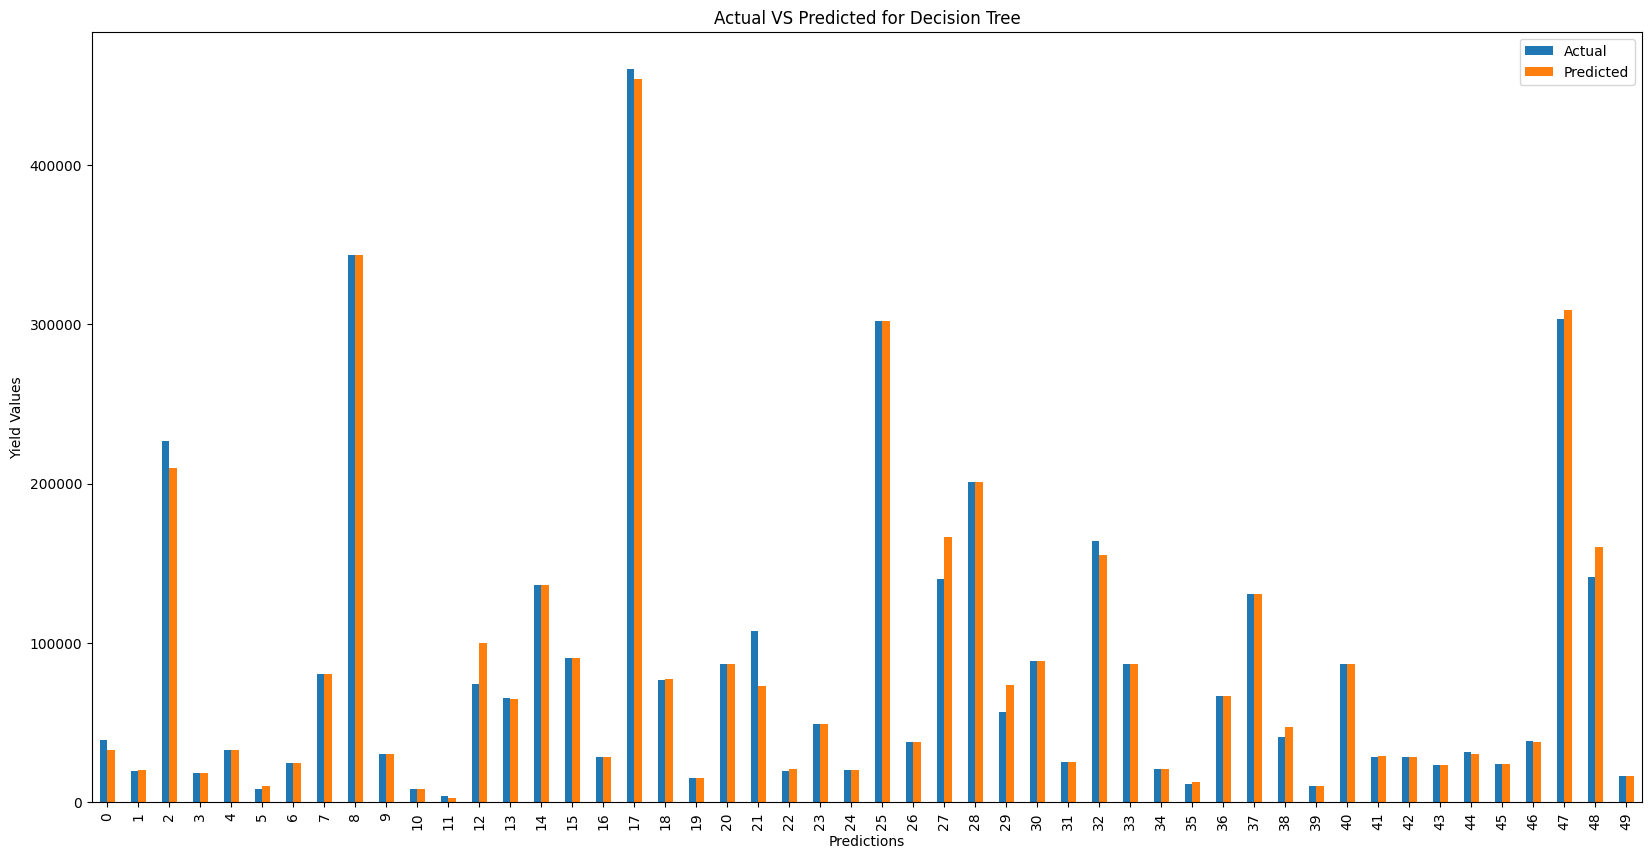

In [303]:
plot_20k_df_tree=pd.DataFrame({'Actual':test_labels, 'Predicted':tree_pred_20k})

bar_plot_20k_df_tree=plot_20k_df_tree[:50]
bar_plot_20k_df_tree.reset_index(inplace=True)
bar_plot_20k_df_tree.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Decision Tree')
plt.show()

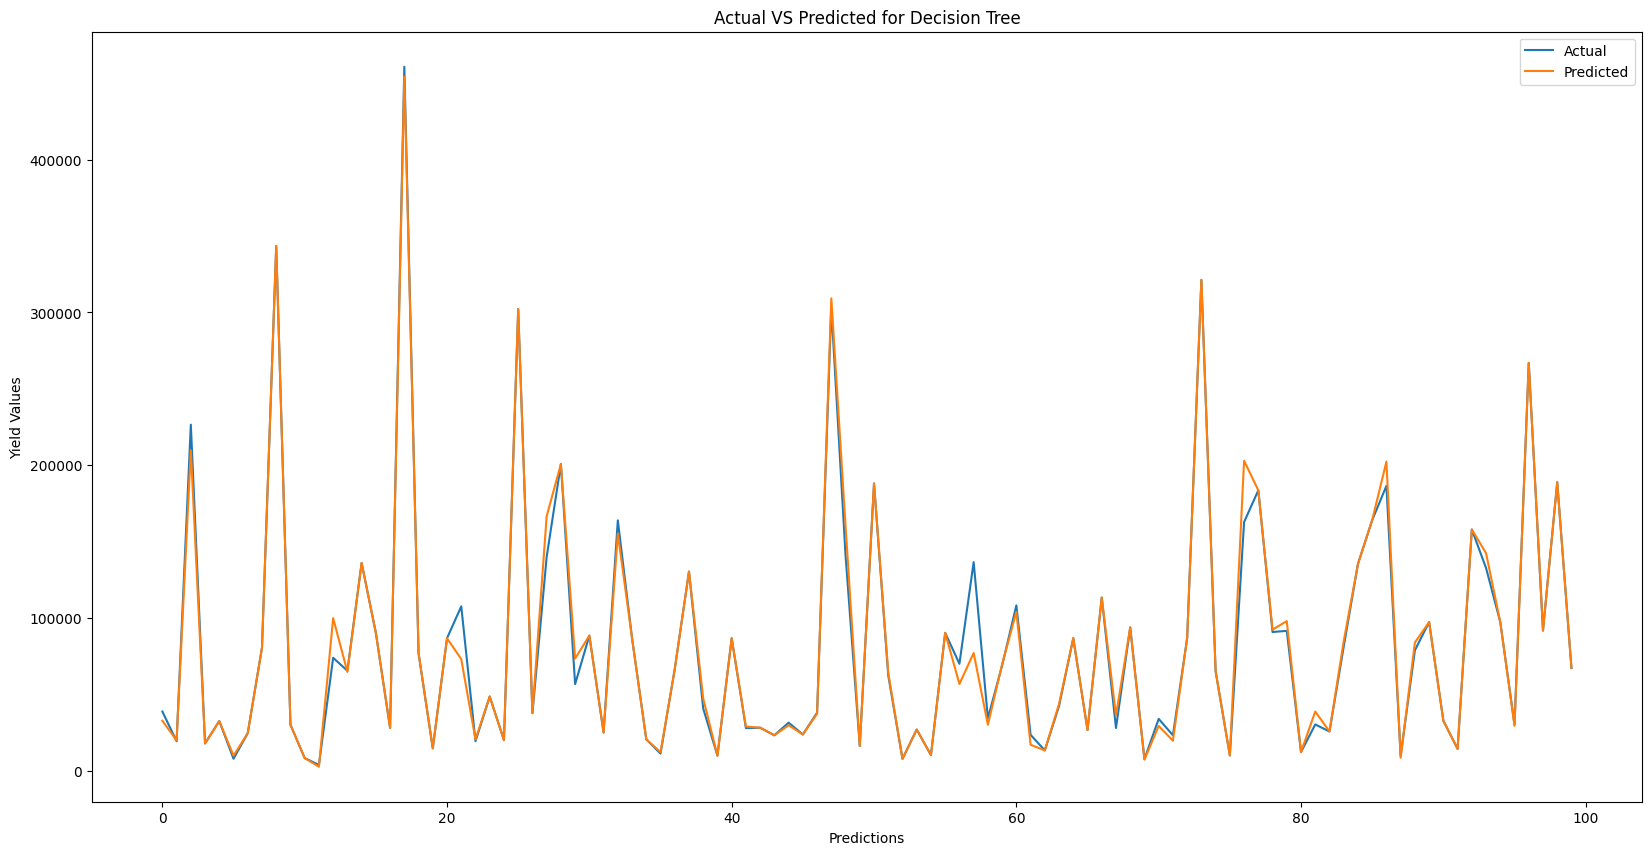

In [304]:
line_plot_20k_df_tree=plot_20k_df_tree[:100]
line_plot_20k_df_tree.reset_index(inplace=True)
line_plot_20k_df_tree.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Decision Tree')
plt.show()

#### **RANDOM FOREST**

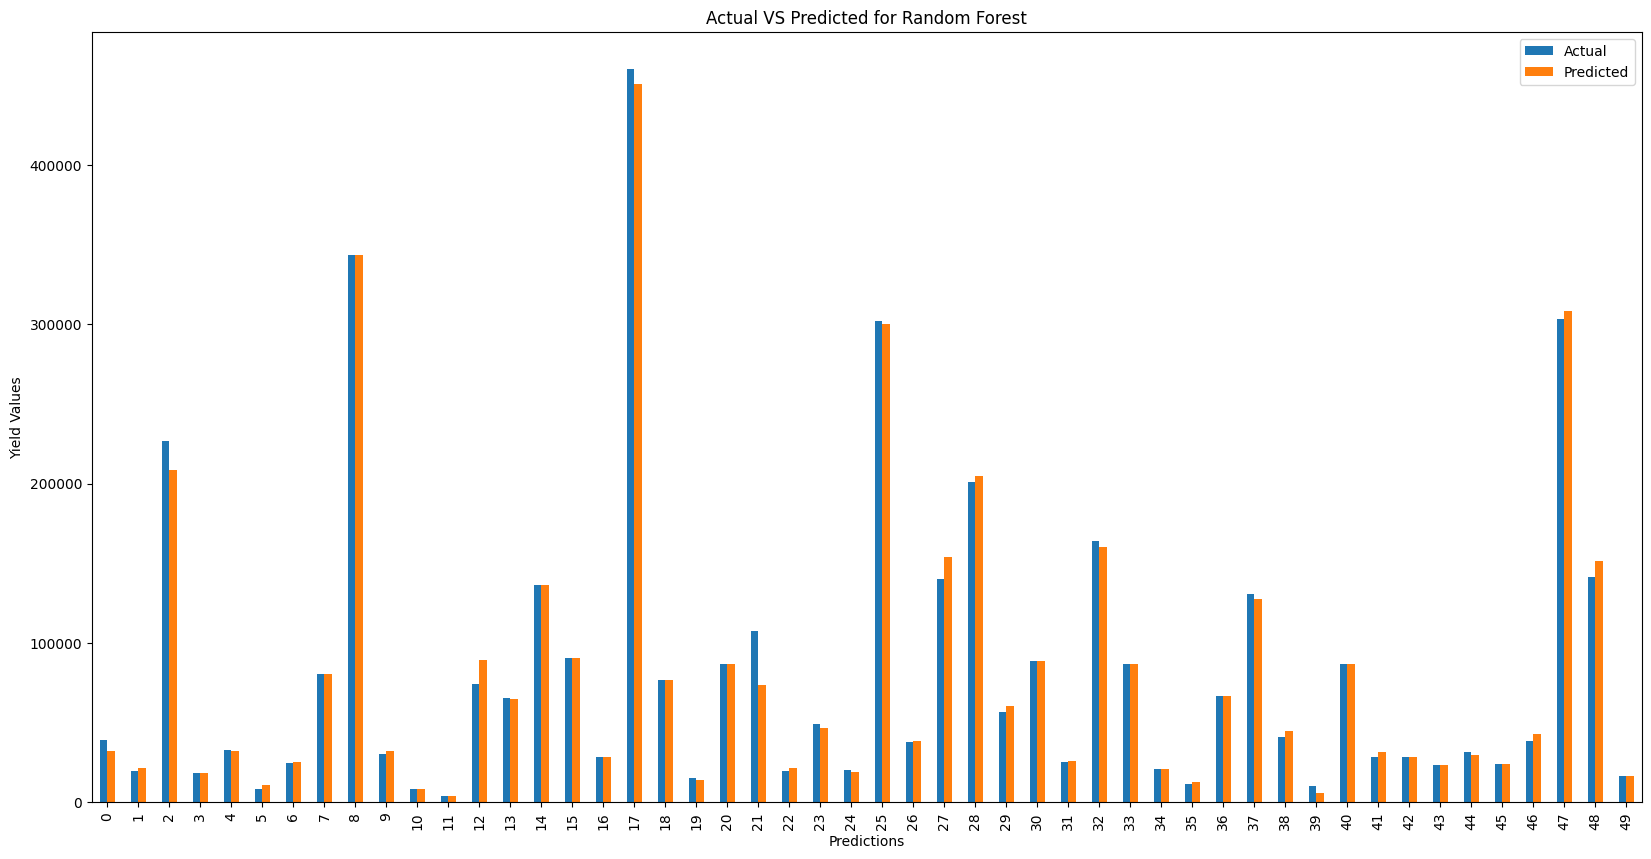

In [309]:
plot_20k_df_random_forest=pd.DataFrame({'Actual':test_labels, 'Predicted':random_forest_pred_20k})

bar_plot_20k_df_random_forest=plot_20k_df_random_forest[:50]
bar_plot_20k_df_random_forest.reset_index(inplace=True)
bar_plot_20k_df_random_forest.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Random Forest')
plt.show()

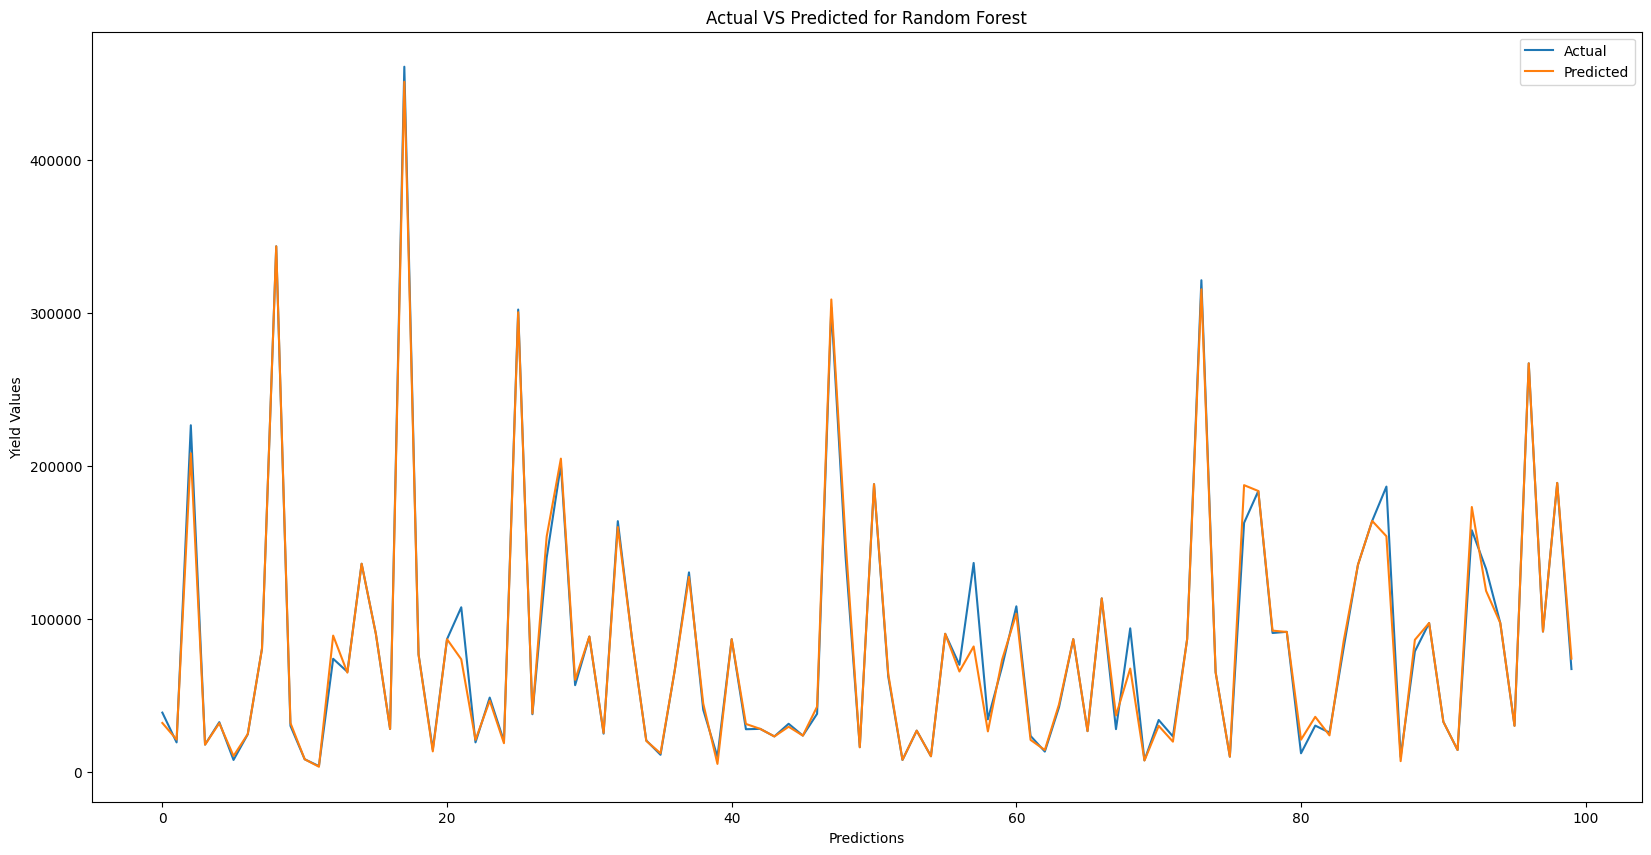

In [307]:
line_plot_20k_df_random_forest=plot_20k_df_random_forest[:100]
line_plot_20k_df_random_forest.reset_index(inplace=True)
line_plot_20k_df_random_forest.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Random Forest')
plt.show()

#### **GRADIENT BOOSTING**

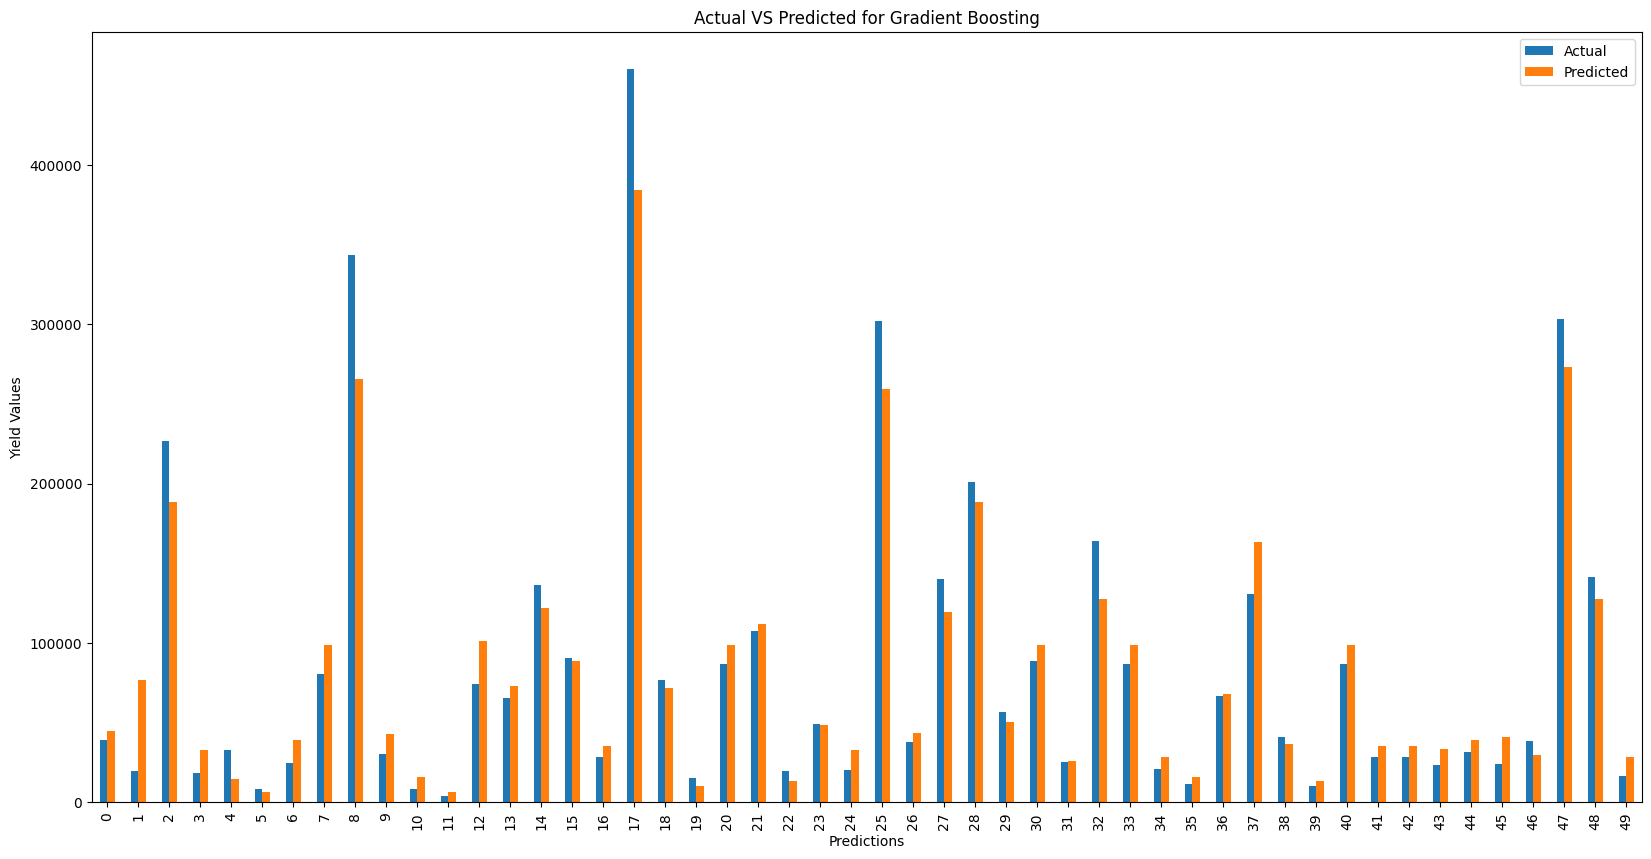

In [310]:
plot_20k_df_gradient_boosting=pd.DataFrame({'Actual':test_labels, 'Predicted':gradient_boosting_pred_20k})

bar_plot_20k_df_gradient_boosting=plot_20k_df_gradient_boosting[:50]
bar_plot_20k_df_gradient_boosting.reset_index(inplace=True)
bar_plot_20k_df_gradient_boosting.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Gradient Boosting')
plt.show()

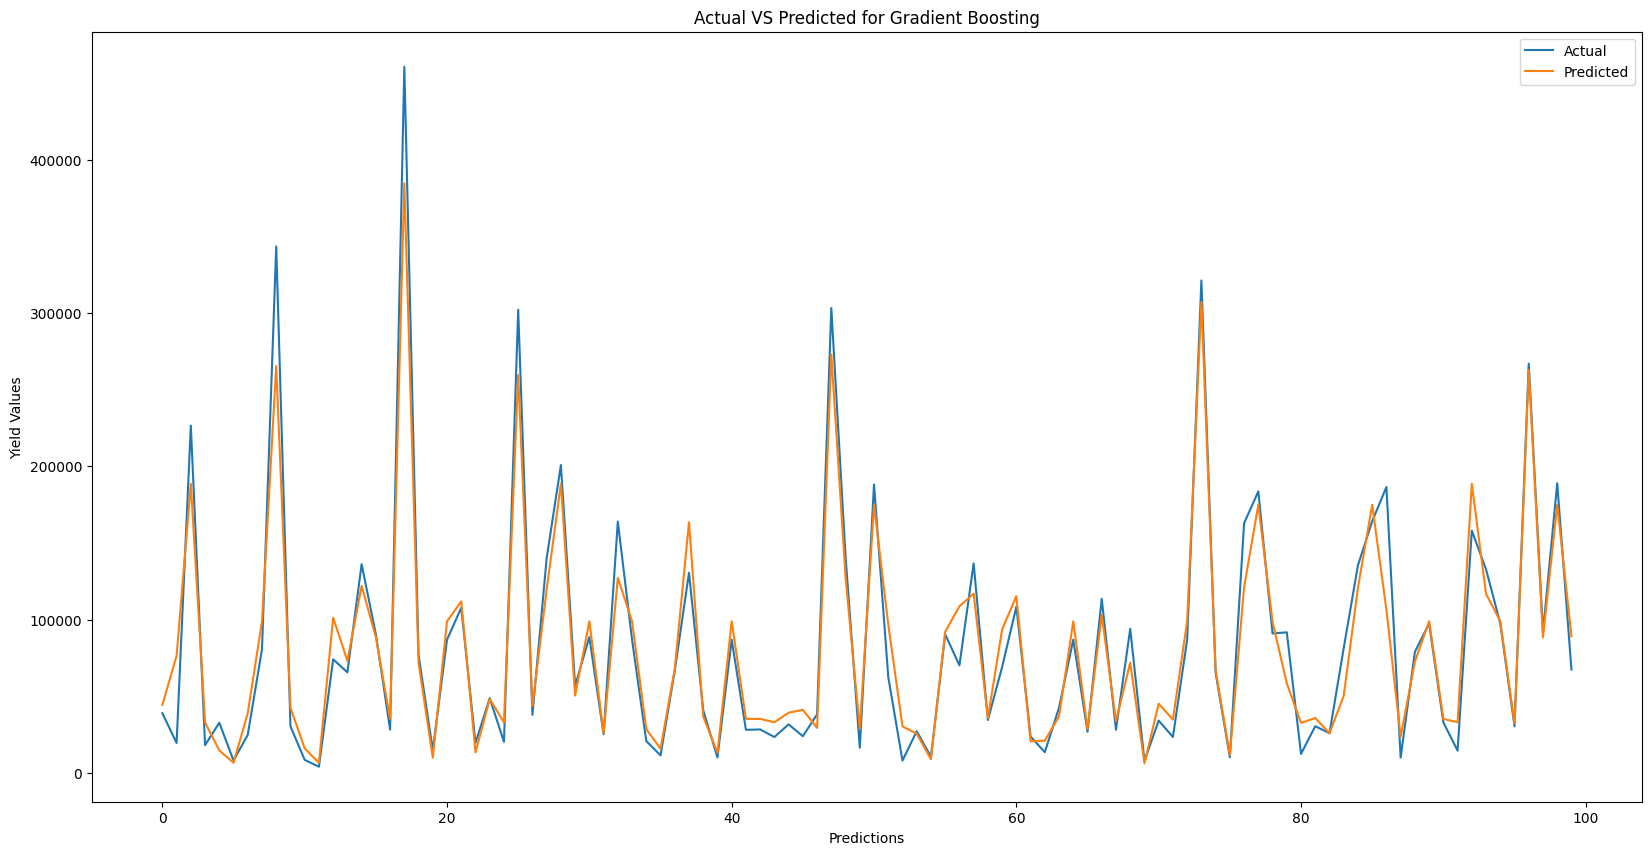

In [311]:
line_plot_20k_df_gradient_boosting=plot_20k_df_gradient_boosting[:100]
line_plot_20k_df_gradient_boosting.reset_index(inplace=True)
line_plot_20k_df_gradient_boosting.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Gradient Boosting')
plt.show()

## **TABULAR FORM**

In [151]:
print(np.concatenate((linear_pred_20k.reshape(len(linear_pred_20k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 28672.  38910.]
 [117120.  19455.]
 [174976. 226577.]
 [ 62592.  18025.]
 [ -6528.  32680.]
 [-27776.   8000.]
 [ 18432.  24761.]
 [128256.  80643.]
 [175616. 343433.]
 [ 75392.  30279.]]


In [152]:
print(np.concatenate((tree_pred_20k.reshape(len(tree_pred_20k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 32888.  38910.]
 [ 20000.  19455.]
 [209840. 226577.]
 [ 18025.  18025.]
 [ 32629.  32680.]
 [ 10000.   8000.]
 [ 24761.  24761.]
 [ 80643.  80643.]
 [343433. 343433.]
 [ 30279.  30279.]]


In [312]:
print(np.concatenate((random_forest_pred_20k.reshape(len(random_forest_pred_20k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 32151.23  38910.  ]
 [ 21311.28  19455.  ]
 [208283.59 226577.  ]
 [ 17996.66  18025.  ]
 [ 32005.17  32680.  ]
 [ 10572.86   8000.  ]
 [ 24877.32  24761.  ]
 [ 80643.    80643.  ]
 [343433.   343433.  ]
 [ 32105.12  30279.  ]]


In [313]:
print(np.concatenate((gradient_boosting_pred_20k.reshape(len(gradient_boosting_pred_20k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 44283.87733408  38910.        ]
 [ 76369.08224599  19455.        ]
 [188577.88616803 226577.        ]
 [ 32895.07973224  18025.        ]
 [ 14606.82049801  32680.        ]
 [  6555.18451169   8000.        ]
 [ 38928.49933723  24761.        ]
 [ 98871.69729536  80643.        ]
 [265464.15614173 343433.        ]
 [ 42448.03641038  30279.        ]]


# **WORKING ON WHOLE DATASET**

In [332]:
features_whole=features[:, :]
label_whole=label[:]

In [333]:
train_data, test_data, train_labels, test_labels = train_test_split(features_whole, label_whole, test_size=0.2, random_state=0)

In [334]:
regressor_linear_whole=LinearRegression()
regressor_linear_whole.fit(train_data, train_labels)

regressor_decision_tree_whole=DecisionTreeRegressor(random_state=0)
regressor_decision_tree_whole.fit(train_data, train_labels)


regressor_random_forest_whole=RandomForestRegressor(random_state=0)
regressor_random_forest_whole.fit(train_data, train_labels)

regressor_gradient_boosting_whole=GradientBoostingRegressor(random_state=0)
regressor_gradient_boosting_whole.fit(train_data, train_labels)

GradientBoostingRegressor(random_state=0)

In [335]:
# Predicting Values

linear_pred_whole=regressor_linear_whole.predict(test_data)
tree_pred_whole=regressor_decision_tree_whole.predict(test_data)
random_forest_pred_whole=regressor_random_forest_whole.predict(test_data)
gradient_boosting_pred_whole=regressor_gradient_boosting_whole.predict(test_data)

#### **EVALUATING MODELS**

In [336]:

r2_linear_whole = r2_score(test_labels,linear_pred_whole)
r2_tree_whole=r2_score(test_labels, tree_pred_whole)
r2_random_forest_whole=r2_score(test_labels, random_forest_pred_whole)
r2_gradient_boosting_whole=r2_score(test_labels, gradient_boosting_pred_whole)
print("R2 Scores\nLinear Regression:", r2_linear_whole, "\nDecision Tree Regressor:", r2_tree_whole, "\nRandom Forest Regressor: ", r2_random_forest_whole)
print("Gradient Boosting: ", r2_gradient_boosting_whole)

R2 Scores
Linear Regression: 0.7518058709692876 
Decision Tree Regressor: 0.9599830237898023 
Random Forest Regressor:  0.9760727470767888
Gradient Boosting:  0.8578114763483753


In [337]:

mae_linear_whole=mean_absolute_error(test_labels, linear_pred_whole)
mae_tree_whole=mean_absolute_error(test_labels, tree_pred_whole)
mae_random_forest_whole=mean_absolute_error(test_labels, random_forest_pred_whole)
mae_gradient_boosting_whole=mean_absolute_error(test_labels, gradient_boosting_pred_whole)
print("Mean Absolute Error\nLinear Regression:", mae_linear_whole, "\nDecision Tree Regressor:", mae_tree_whole, "\nRandom Forest Regressor: ", mae_random_forest_whole)
print("Gradient Boosting: ", mae_gradient_boosting_whole)

Mean Absolute Error
Linear Regression: 29744.274384846874 
Decision Tree Regressor: 6237.231987962471 
Random Forest Regressor:  5634.2958987767315
Gradient Boosting:  20886.20791454083


In [338]:

mse_linear_whole=mean_squared_error(test_labels, linear_pred_whole)
mse_tree_whole=mean_squared_error(test_labels, tree_pred_whole)
mse_random_forest_whole=mean_squared_error(test_labels, random_forest_pred_whole)
mse_gradient_boosting_whole=mean_squared_error(test_labels, gradient_boosting_pred_whole)

print("Mean Squared Error\nLinear Regression:", mse_linear_whole, "\nDecision Tree Regressor:", mse_tree_whole, "\nRandom Forest Regressor: ", mse_random_forest_whole)
print("Gradient Boosting: ", mse_gradient_boosting_whole)

Mean Squared Error
Linear Regression: 1854242940.4188352 
Decision Tree Regressor: 298964346.67673236 
Random Forest Regressor:  178759022.1805377
Gradient Boosting:  1062281639.0510855


In [339]:
rmse_linear_whole=np.sqrt(mean_squared_error(test_labels, linear_pred_whole))
rmse_tree_whole=np.sqrt(mean_squared_error(test_labels, tree_pred_whole))
rmse_random_forest_whole=np.sqrt(mean_squared_error(test_labels, random_forest_pred_whole))
rmse_gradient_boosting_whole=np.sqrt(mean_squared_error(test_labels, gradient_boosting_pred_whole))

print("Root Mean Squared Error\nLinear Regression:", rmse_linear_whole, "\nDecision Tree Regressor:", rmse_tree_whole, "\nRandom Forest Regressor: ", rmse_random_forest_whole)
print("Gradient Boosting: ", rmse_gradient_boosting_whole)

Root Mean Squared Error
Linear Regression: 43060.92126765096 
Decision Tree Regressor: 17290.585492594873 
Random Forest Regressor:  13370.079363284935
Gradient Boosting:  32592.662349846254


## **PLOTTING**

####**MULTIPLE LINEAR REGRESSION**

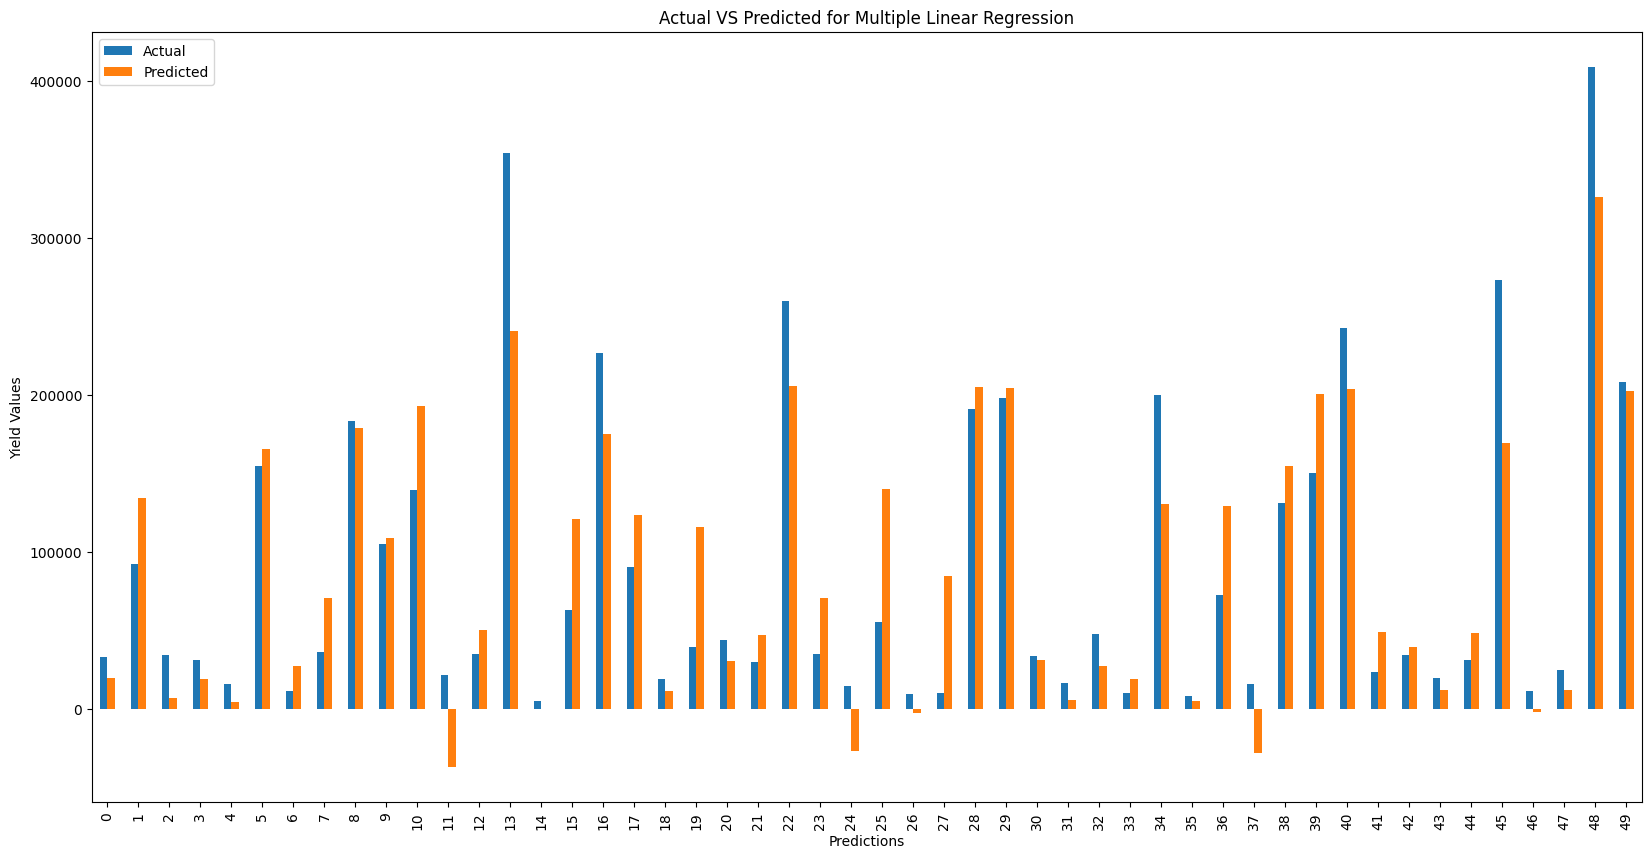

In [340]:
# MULTIPLE LINEAR REGRESSION BAR PLOT

plot_whole_df_linear=pd.DataFrame({'Actual':test_labels, 'Predicted':linear_pred_whole})

bar_plot_whole_results=plot_whole_df_linear[:50]
bar_plot_whole_results.reset_index(inplace=True)
bar_plot_whole_results.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Multiple Linear Regression')
plt.show()

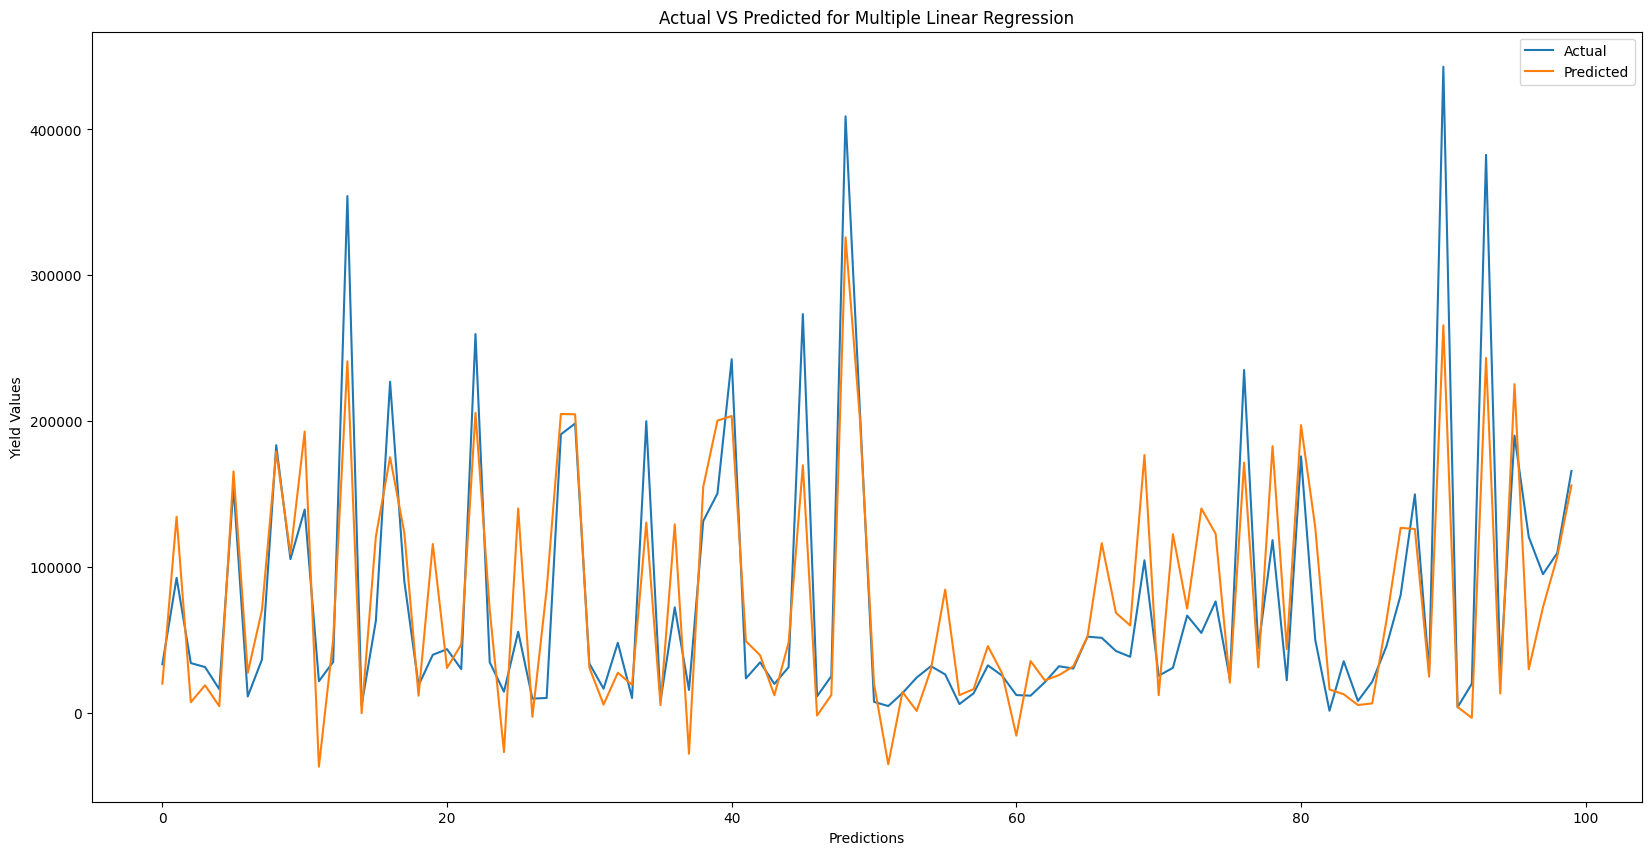

In [341]:
# Multiple Linear Regression Line Plot


line_plot_whole_results=plot_whole_df_linear[:100]
line_plot_whole_results.reset_index(inplace=True)
line_plot_whole_results.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Multiple Linear Regression')
plt.show()

#### **DECISION TREE**

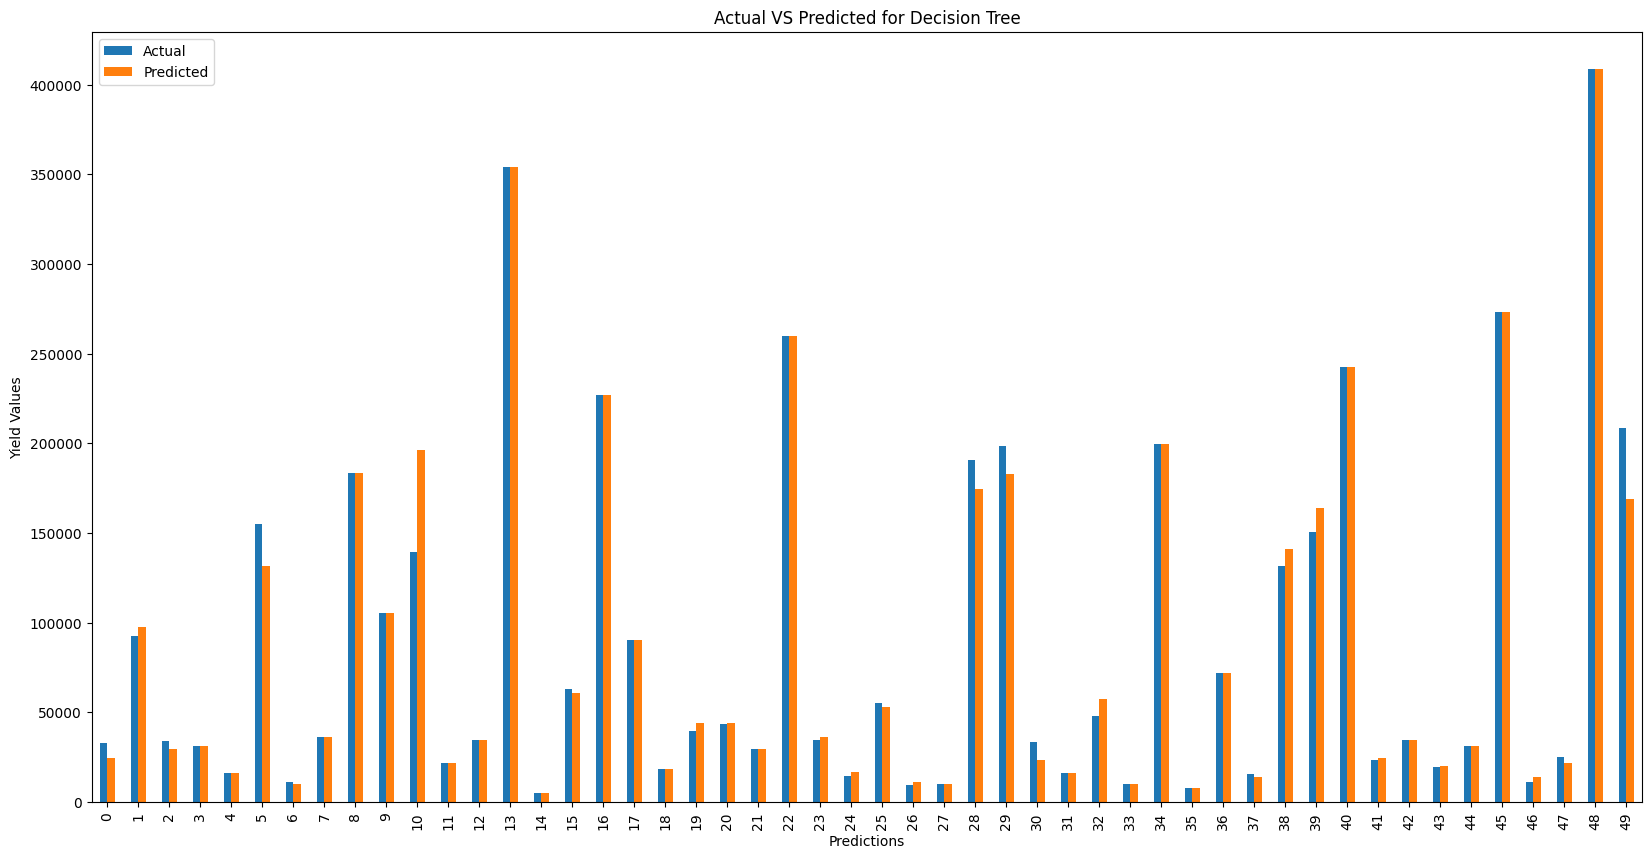

In [342]:
plot_whole_df_tree=pd.DataFrame({'Actual':test_labels, 'Predicted':tree_pred_whole})

bar_plot_whole_df_tree=plot_whole_df_tree[:50]
bar_plot_whole_df_tree.reset_index(inplace=True)
bar_plot_whole_df_tree.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Decision Tree')
plt.show()

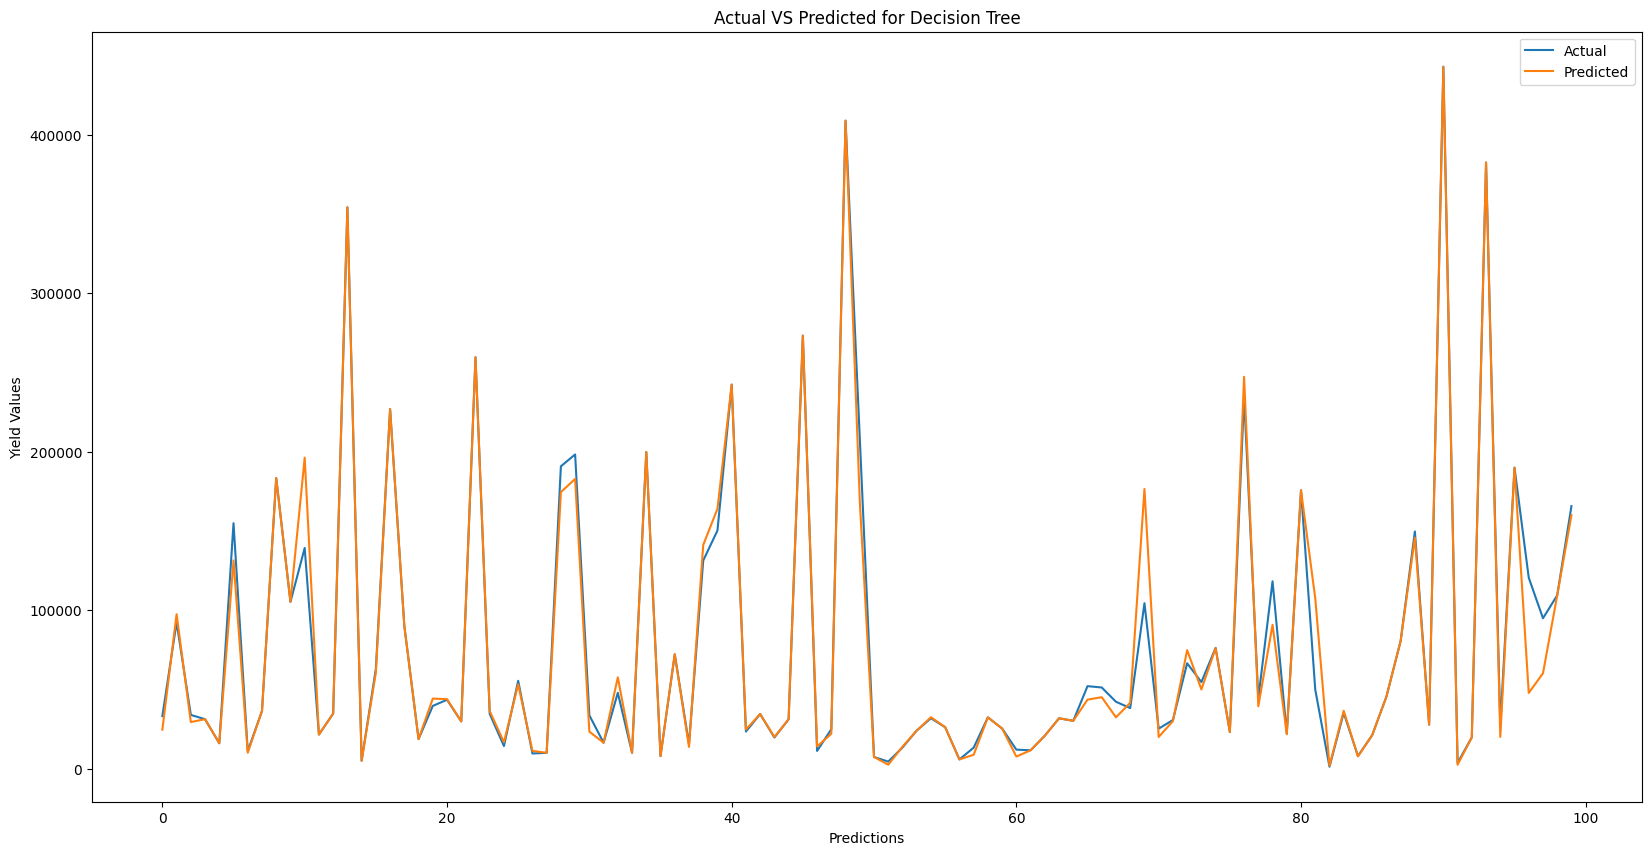

In [343]:
line_plot_whole_df_tree=plot_whole_df_tree[:100]
line_plot_whole_df_tree.reset_index(inplace=True)
line_plot_whole_df_tree.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Decision Tree')
plt.show()

#### **RANDOM FOREST**

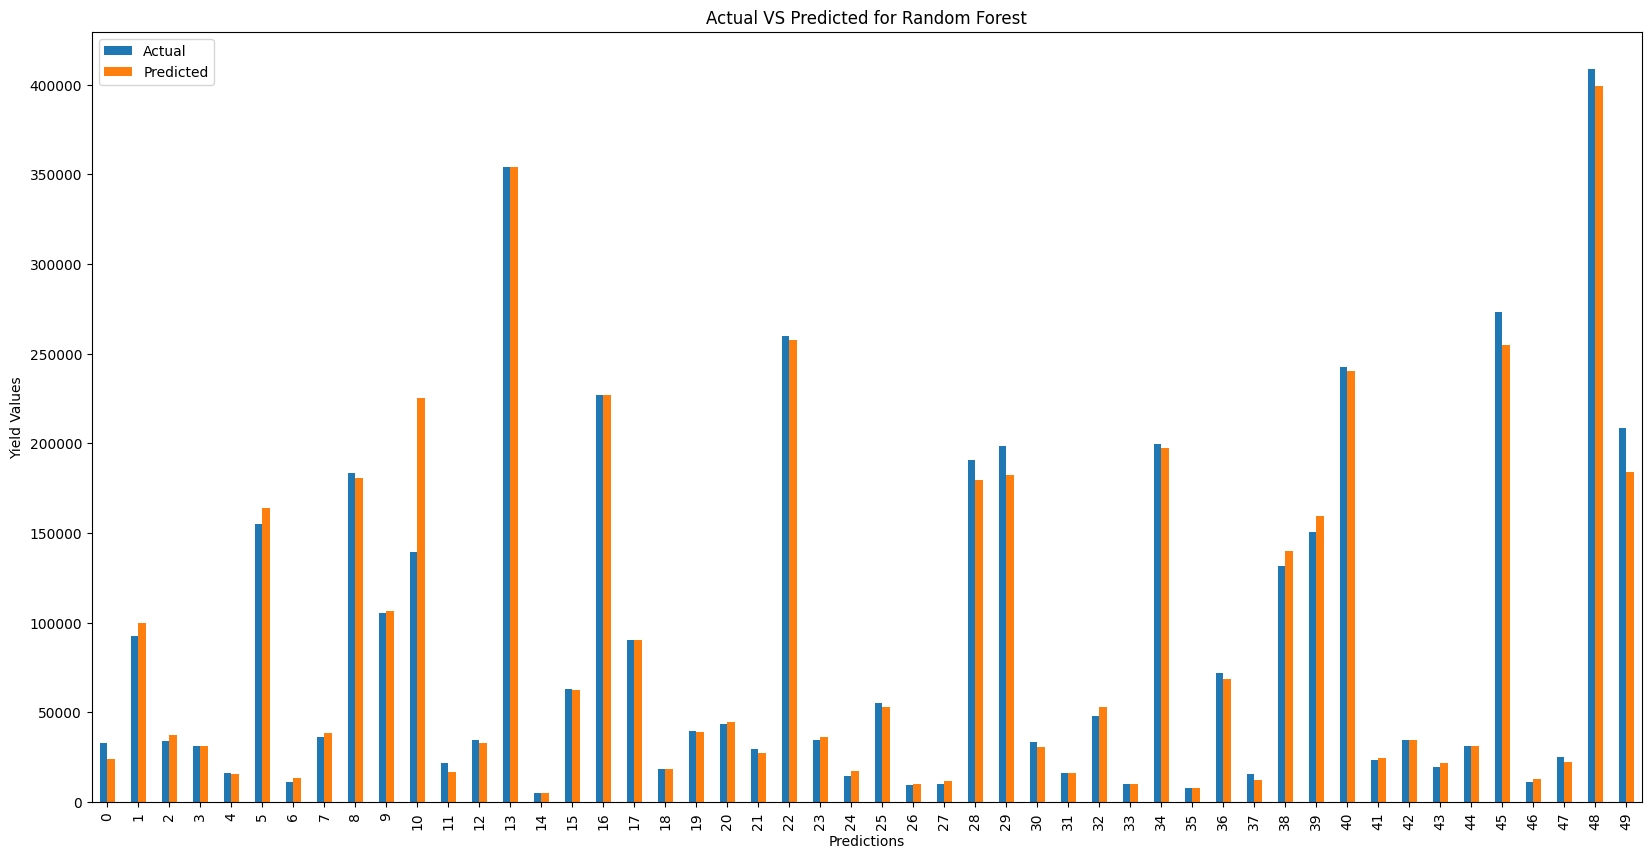

In [344]:
plot_whole_df_random_forest=pd.DataFrame({'Actual':test_labels, 'Predicted':random_forest_pred_whole})

bar_plot_whole_df_random_forest=plot_whole_df_random_forest[:50]
bar_plot_whole_df_random_forest.reset_index(inplace=True)
bar_plot_whole_df_random_forest.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Random Forest')
plt.show()

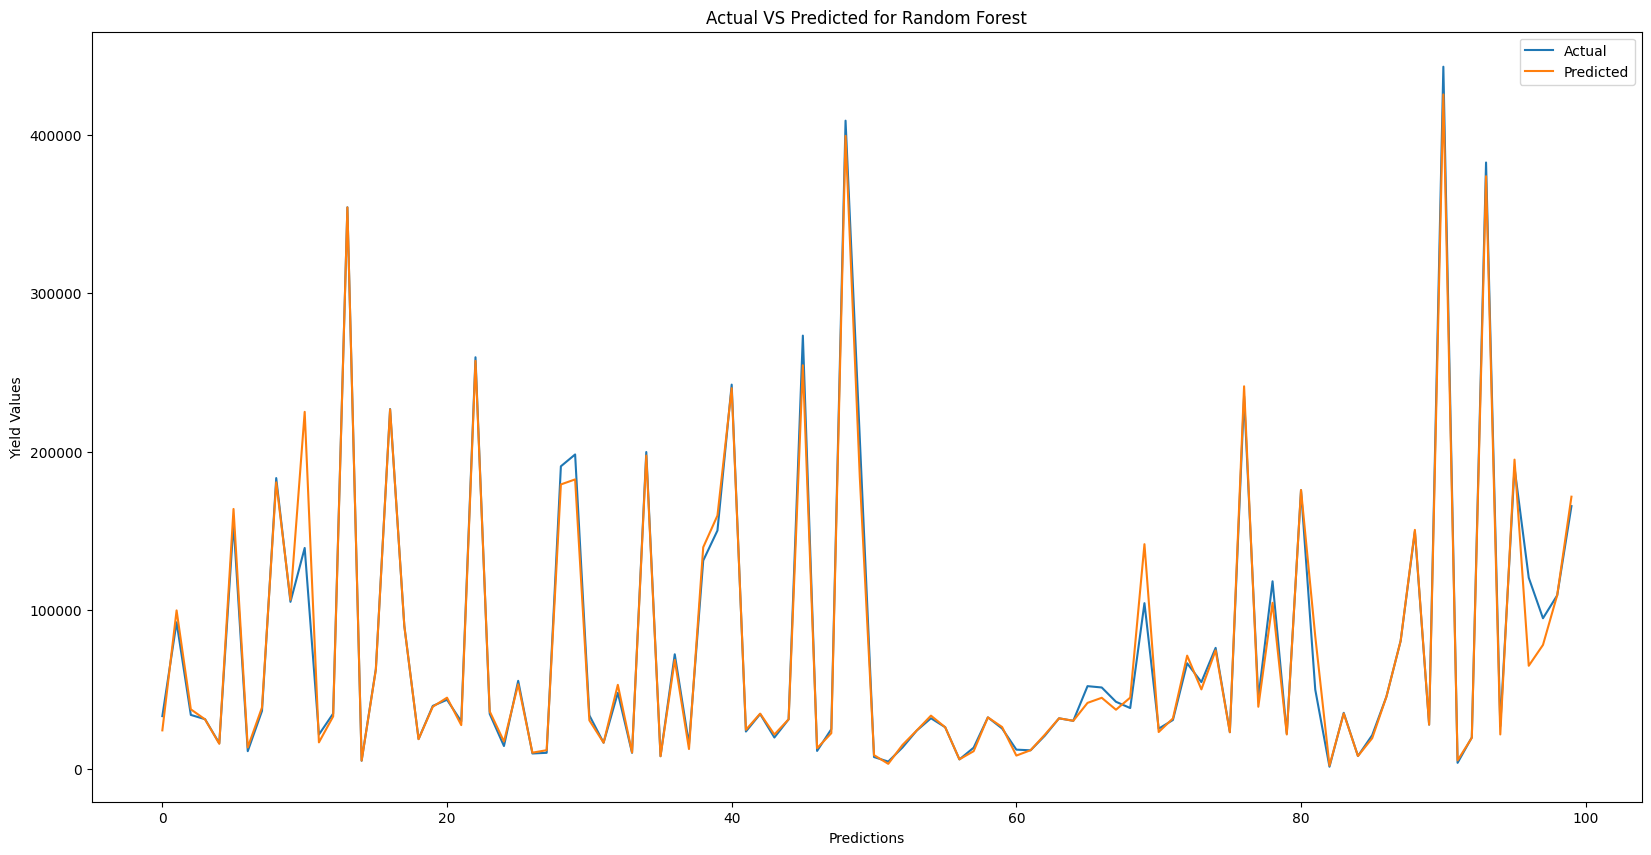

In [345]:
line_plot_whole_df_random_forest=plot_whole_df_random_forest[:100]
line_plot_whole_df_random_forest.reset_index(inplace=True)
line_plot_whole_df_random_forest.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Random Forest')
plt.show()

#### **GRADIENT BOOSTING**

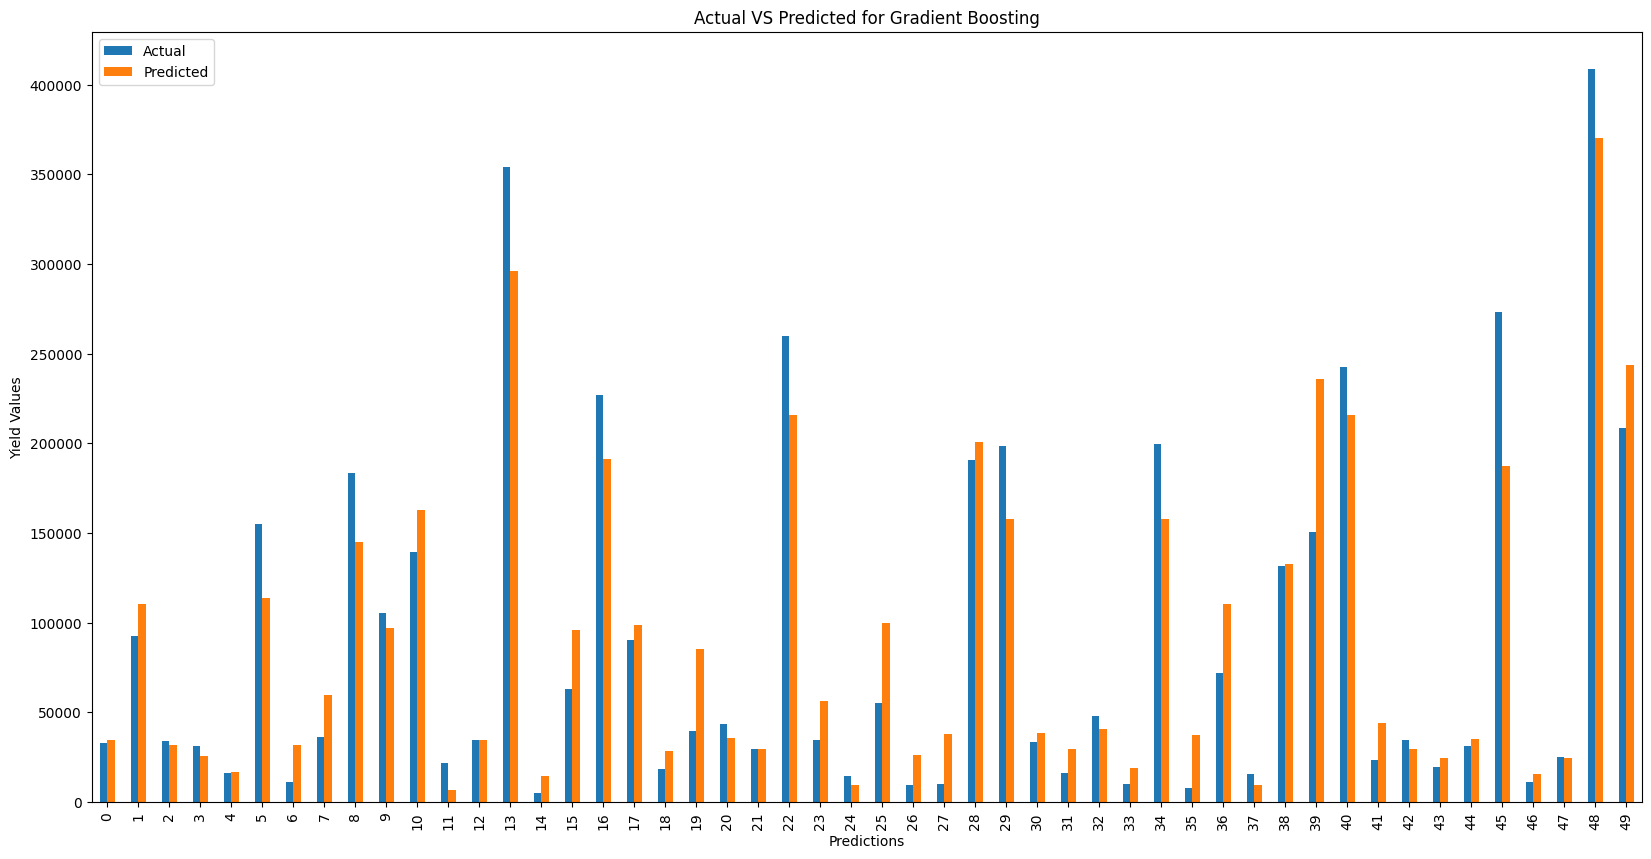

In [346]:
plot_whole_df_gradient_boosting=pd.DataFrame({'Actual':test_labels, 'Predicted':gradient_boosting_pred_whole})

bar_plot_whole_df_gradient_boosting=plot_whole_df_gradient_boosting[:50]
bar_plot_whole_df_gradient_boosting.reset_index(inplace=True)
bar_plot_whole_df_gradient_boosting.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Gradient Boosting')
plt.show()

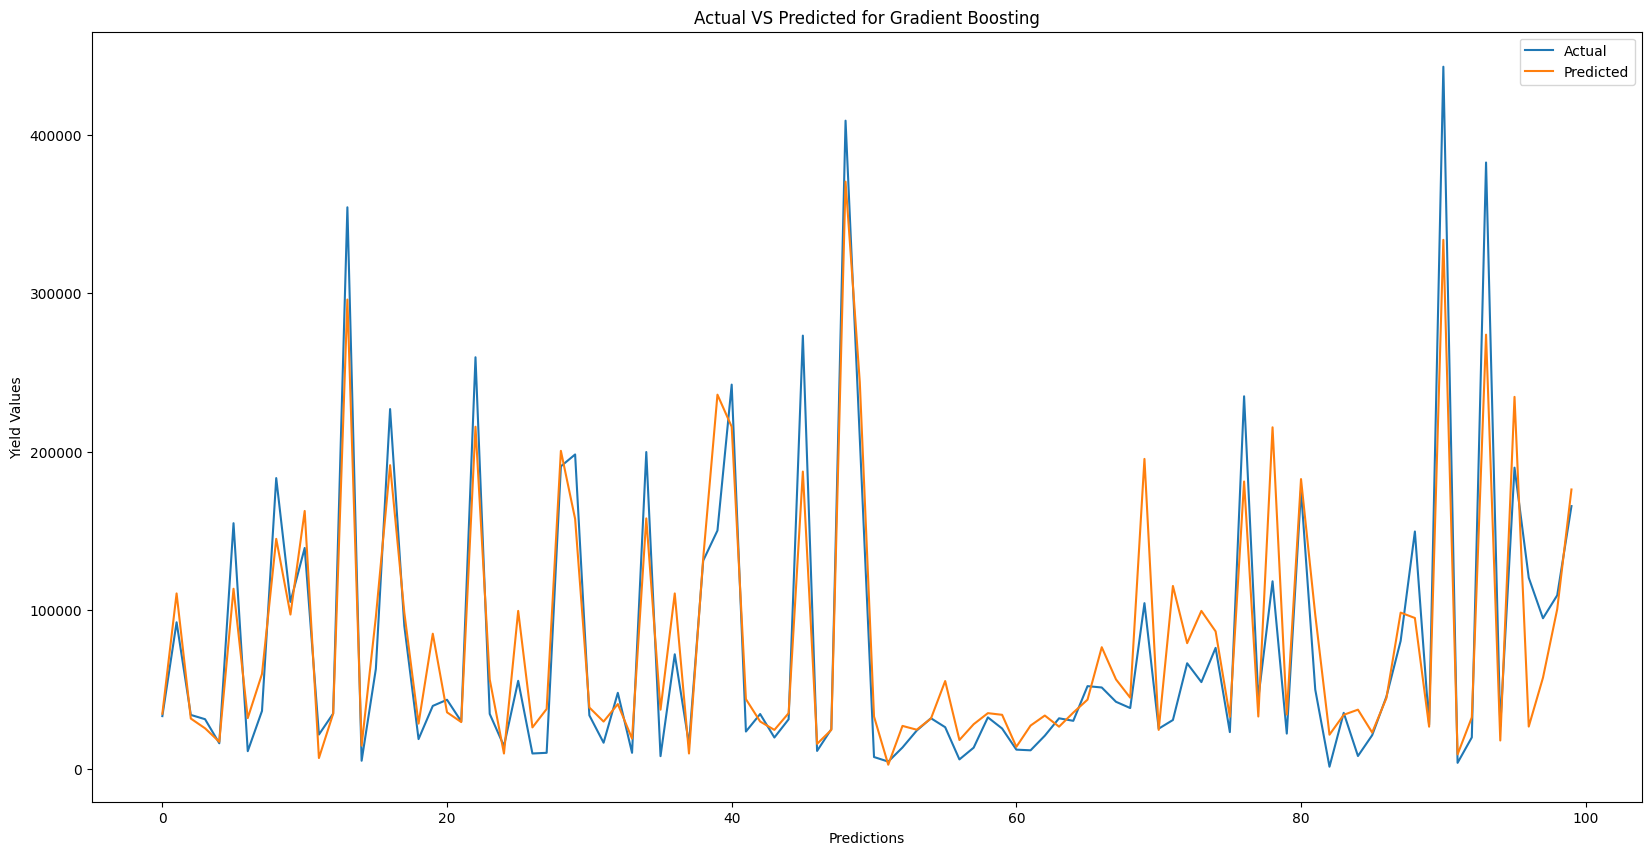

In [347]:
line_plot_whole_df_gradient_boosting=plot_whole_df_gradient_boosting[:100]
line_plot_whole_df_gradient_boosting.reset_index(inplace=True)
line_plot_whole_df_gradient_boosting.plot(x='index',kind='line', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted for Gradient Boosting')
plt.show()

## **TABULAR FORM**

In [161]:
# np.set_printoptions(precision=5)
print(np.concatenate((linear_pred_whole.reshape(len(linear_pred_whole), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 19852.  33157.]
 [134348.  92373.]
 [  7100.  33919.]
 [ 18716.  31214.]
 [  4364.  16010.]
 [165404. 154928.]
 [ 27288.  11029.]
 [ 70408.  36429.]
 [178996. 183405.]
 [108932. 105267.]]


In [162]:
print(np.concatenate((tree_pred_whole.reshape(len(tree_pred_whole), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 24602.33333333  33157.        ]
 [ 97487.          92373.        ]
 [ 29411.          33919.        ]
 [ 31214.          31214.        ]
 [ 16103.          16010.        ]
 [131429.         154928.        ]
 [ 10050.          11029.        ]
 [ 36429.          36429.        ]
 [183405.         183405.        ]
 [105267.         105267.        ]]


In [348]:
print(np.concatenate((random_forest_pred_whole.reshape(len(random_forest_pred_whole), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 24167.02095238  33157.        ]
 [ 99880.17        92373.        ]
 [ 37446.95        33919.        ]
 [ 31095.96        31214.        ]
 [ 15693.05        16010.        ]
 [163909.26       154928.        ]
 [ 13355.85        11029.        ]
 [ 38631.17        36429.        ]
 [180732.64       183405.        ]
 [106594.93       105267.        ]]


In [349]:
print(np.concatenate((gradient_boosting_pred_whole.reshape(len(gradient_boosting_pred_whole), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 34669.91596014  33157.        ]
 [110595.95428167  92373.        ]
 [ 31609.72697841  33919.        ]
 [ 25470.07621937  31214.        ]
 [ 16957.9977064   16010.        ]
 [113553.42081062 154928.        ]
 [ 31914.97800527  11029.        ]
 [ 59737.09189868  36429.        ]
 [145046.28871752 183405.        ]
 [ 97274.533293   105267.        ]]
